### Reading dataset

<ul style="list-style-type:circle">
  <li> Missing value analysis</li>
  <li>Transformation of dates</li>
  <li>Univariate Analysis</li>
    <li>Analysing numerical columns</li>
    <li>Outliers</li>
    <li>Bivariate analysis</li>
</ul>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)


In [2]:
pd.set_option('display.max_columns', 100)

%matplotlib inline

# Reading application  data

In [3]:
df_application = pd.read_csv('.\\application_data.csv')
df_application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single /

In [4]:
df_application.shape

(307511, 122)

In [5]:
df_application.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                 int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                   

# First we analyze missing values in data frame

In [6]:
df_miss_application =  df_application.count()/len(df_application)
df_miss_application = (1-df_miss_application)*100
df_miss_application.sort_values(ascending=False).head(60)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
FLOORSMIN_MEDI                  67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_AVG                   67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_AVG                 66.497784
YEARS_BUILD_MODE                66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
LANDAREA_MEDI                   59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

# lets ignore the columns which have missing values more than 50%

In [7]:
train = df_application.loc[:, df_miss_application<50]

# Treating missing value

As you can observe, there are lot of columns with missing values. There are some columns which has missing values around or less than 50%. Other columns has significantly less missing value. Also, the columns for which has missing values are around or less than 50% are mostly either mean, median or mode. So, there is no way one can replace these missing data. So, we will not consider these columns for analysis. We will consider other columns for analysis. Let's analyse the other columns. 

In [8]:
# OCCUPATION_TYPE                 31.345545
# EXT_SOURCE_3                    19.825307
# AMT_REQ_CREDIT_BUREAU_QRT       13.501631
# AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
# AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
# AMT_REQ_CREDIT_BUREAU_MON       13.501631
# AMT_REQ_CREDIT_BUREAU_DAY       13.501631
# AMT_REQ_CREDIT_BUREAU_HOUR      13.501631

# Let's analylize these above metnioned columns  one by one

# Column: OCCUPATION_TYPE
 

In [9]:
train['OCCUPATION_TYPE'].unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers', nan,
       'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)


As you can see, column OCCUPATION_TYPE has 31% missing data, which is a huge number.
meaning it would be approprite to remove this column
However,if you go through this column, this seems to look important.
So, we will not analyse this column as we will keep it.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

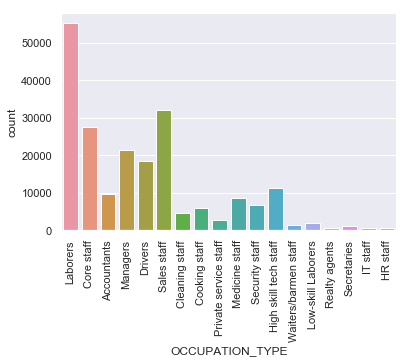

In [10]:
sns.countplot(x= 'OCCUPATION_TYPE', data = train)
plt.xticks(rotation=90)

As you can see that this column has considerable perentage of missing values, that is 31%. Since it is a categorrical column, we can only replace it with mode value. But, replacing all of these 31% missing values with "Laborers" class will not be fair. So, we will leave it as it is and will not do any missing value treatment here. 

# Column: EXT_SOURCE_3

In [11]:
train['EXT_SOURCE_3'].head(10)

0    0.139376
1         NaN
2    0.729567
3         NaN
4         NaN
5    0.621226
6    0.492060
7    0.540654
8    0.751724
9         NaN
Name: EXT_SOURCE_3, dtype: float64

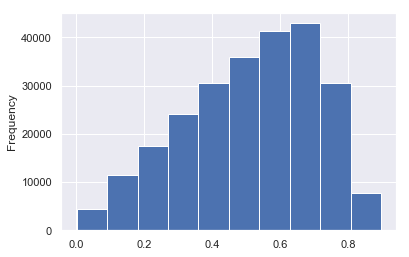

In [12]:
# Plotting the distribution
train['EXT_SOURCE_3'].plot.hist()

In [13]:
train['EXT_SOURCE_3'].mean()

0.5108529061800121

In [14]:
#train['EXT_SOURCE_3'].mode() --reviewed By Nrmalya and me 

This data is normal distribution.

## Column: AMT_REQ_CREDIT_BUREAU_QRT


In [15]:
train['AMT_REQ_CREDIT_BUREAU_QRT'].head()

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

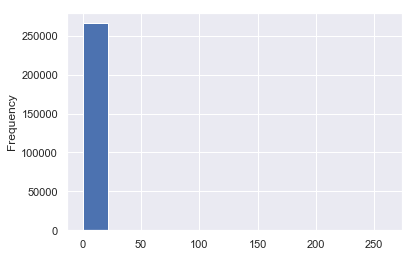

In [16]:
#df_application['AMT_REQ_CREDIT_BUREAU_QRT'].plot.hist()
num_unique_values =  len(train.AMT_REQ_CREDIT_BUREAU_QRT.unique())
train['AMT_REQ_CREDIT_BUREAU_QRT'].plot.hist(bins = num_unique_values)

In [17]:
train.AMT_REQ_CREDIT_BUREAU_QRT.value_counts()

0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
7.0           7
8.0           7
19.0          1
261.0         1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

In [18]:
train['AMT_REQ_CREDIT_BUREAU_QRT'].mean()

0.26547414959848414

In [19]:
train['AMT_REQ_CREDIT_BUREAU_QRT'].mode()

0    0.0
dtype: float64

In [20]:
train.AMT_REQ_CREDIT_BUREAU_QRT.unique()

array([  0.,  nan,   1.,   2.,   4.,   3.,   8.,   5.,   6.,   7., 261.,
        19.])

Looks like this column only takes discrete values,integers so we cannot replace it by mean value. Here, we will replace it by mode

# Column: AMT_REQ_CREDIT_BUREAU_YEAR


In [21]:
train['AMT_REQ_CREDIT_BUREAU_YEAR'].head(10)

0    1.0
1    0.0
2    0.0
3    NaN
4    0.0
5    1.0
6    2.0
7    0.0
8    1.0
9    NaN
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

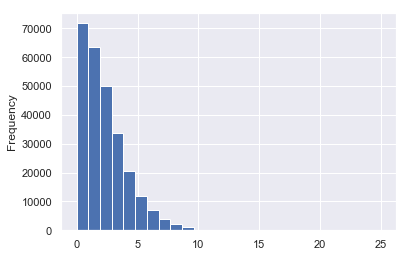

In [22]:
num_unique_values =  len(train.AMT_REQ_CREDIT_BUREAU_YEAR.unique())
train['AMT_REQ_CREDIT_BUREAU_YEAR'].plot.hist(bins = num_unique_values);

In [23]:
train['AMT_REQ_CREDIT_BUREAU_YEAR'].mean()

1.899974435321363

In [24]:
train['AMT_REQ_CREDIT_BUREAU_YEAR'].median()

1.0

As you can see that the values are only integers, either 0,1,2....10 or something else. If want to replace then should be  replace by median value as data is spreaded across the 0-10.

# Column: AMT_REQ_CREDIT_BUREAU_WEEK


In [25]:
train['AMT_REQ_CREDIT_BUREAU_WEEK'].head(10)

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    NaN
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

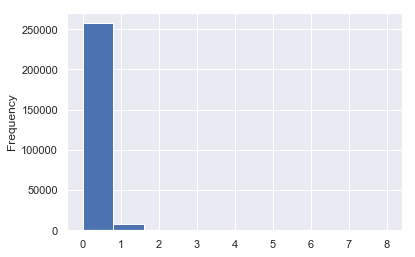

In [26]:
num_unique_values =  len(train.AMT_REQ_CREDIT_BUREAU_WEEK.unique())
train['AMT_REQ_CREDIT_BUREAU_WEEK'].plot.hist(bins = num_unique_values);

As you can see, mostly the values are 0's. This column is mostly constant and has no variation. meaning We can ignore this column for analysis.

# Column: AMT_REQ_CREDIT_BUREAU_MON

In [27]:
train['AMT_REQ_CREDIT_BUREAU_MON'].head(10)

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
5    0.0
6    1.0
7    0.0
8    0.0
9    NaN
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

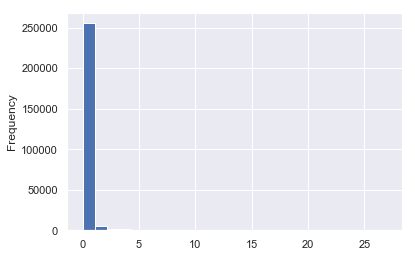

In [28]:
num_unique_values =  len(train.AMT_REQ_CREDIT_BUREAU_MON.unique())
train['AMT_REQ_CREDIT_BUREAU_MON'].plot.hist(bins = num_unique_values);

Same as above column AMT_REQ_CREDIT_BUREAU_WEEK, mostly the values are 0's.This column is mostly constant and has no variation. meaning We can ignore this column for analysis.

# Column: AMT_REQ_CREDIT_BUREAU_DAY


In [29]:
train['AMT_REQ_CREDIT_BUREAU_DAY'].head(10)

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    NaN
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

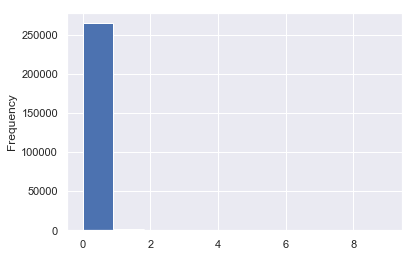

In [30]:
num_unique_values =  len(train.AMT_REQ_CREDIT_BUREAU_DAY.unique())
train['AMT_REQ_CREDIT_BUREAU_DAY'].plot.hist(bins = num_unique_values);

In [31]:
train.AMT_REQ_CREDIT_BUREAU_DAY.value_counts()

0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

Again,all the values are 0's. So, we can replace values with zero column. 

# Column: AMT_REQ_CREDIT_BUREAU_HOUR


In [32]:
train['AMT_REQ_CREDIT_BUREAU_HOUR'].head(10)

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    NaN
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

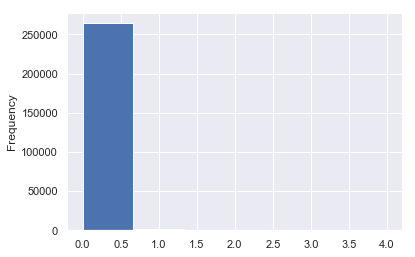

In [33]:
num_unique_values =  len(train.AMT_REQ_CREDIT_BUREAU_HOUR.unique())
train['AMT_REQ_CREDIT_BUREAU_HOUR'].plot.hist(bins = num_unique_values);

In [34]:
train.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts()

0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

Again, we can replace values by zero in this column.

In [35]:
train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOOR

# Target

# Total users 

In [36]:
train['TARGET'].count()

307511

Client with payment difficulties

In [37]:
(train['TARGET']==1).sum()

24825

Other clients

In [38]:
(train['TARGET']==0).sum()

282686


Imbalance percentage.

In [39]:
#(train['TARGET']==0).sum()/(train['TARGET']==1).sum()
print('The percentage of 0 in Target column is: ',((train['TARGET']==0).sum()/(train['TARGET']).count()*100))
print('The percentage of 1 in Target column is: ',((train['TARGET']==1).sum()/(train['TARGET']).count()*100))

The percentage of 0 in Target column is:  91.92711805431351
The percentage of 1 in Target column is:  8.072881945686495


# Now, we will analyse numerical and categorical data. Let's start with categorical data.


# Analysing categorical data
Since due to data imbalance, we will separate out the train with a target equal to 0 and train with a target equal to 1. And we will analyse them individually and try to find any relationship if it exists. 

In [40]:
train_0 = train.loc[train['TARGET'] == 0]
train_1 = train.loc[train['TARGET'] == 1]

# Here, we have used 3 different plots for analysis


Pie plot: For plotting the all the values present in a column in terms of percentage. So, the sum of those data types will be 100. 


Countplot 1: 
Here, plotted the count of the different categories. So, Target=0 will have higher count than Target=1. 

Countplot 2: 
To plot this dataset, we have first divided the dataset into 2 subsets, Target=0 and Target=1. Then again divided the individual Target=0 and Target=1 into different categories. Then, plotted these categories in terms of percentage. So, you can find that the values for Target=0 and Target=1 are mostly equal. Please go through the code of this plot to understand for further doubts.  

In [41]:
def plotting(train, train0, train1, column):
    
    train = train
    train_0 = train0
    train_1 = train1
    col = column
    
    fig = plt.figure(figsize=(13,10))
    
    ax1 = plt.subplot(221)
    train[col].value_counts().plot.pie(autopct = "%1.0f%%", ax=ax1)
    plt.title('Plotting data for the column: '+ column)
    
    ax2 = plt.subplot(222)
    sns.countplot(x= column, hue = 'TARGET', data = train, ax = ax2)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')

    #https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html
    ax3 = plt.subplot(223)
    df = pd.DataFrame()
    df['0']= ((train_0[col].value_counts())/len(train_0))
    df['1']= ((train_1[col].value_counts())/len(train_1))
    df.plot.bar(ax=ax3)
    plt.title('Plotting data for target in terms of percentage')


    fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    plt.show()

In [42]:
train_categorical = train.select_dtypes(include=['object']).columns

# Univariate Analysis of the Categorical data


# Plotting the data.
Ex: For column "NAME_CONTRACT_TYPE", in the first plot, 90% 'cash_loans' are there and 10% 'Revolving_loans' are there. In the second plot, the numnber of 'cash_loans' is ~250,000 and ~2500 for 'cash_loans' for Target=0. Similarly for Target=1. In the last plot, since we have plotted the dataset in terms of percentage, so, sum of 'blue' colour for 'cash_loans' and 'Revolving_loans' for Target=0 is 1. Similarly, sum of orange' colour for 'cash_loans' and 'Revolving_loans' for Target=1 is 1.

Plotting  NAME_CONTRACT_TYPE


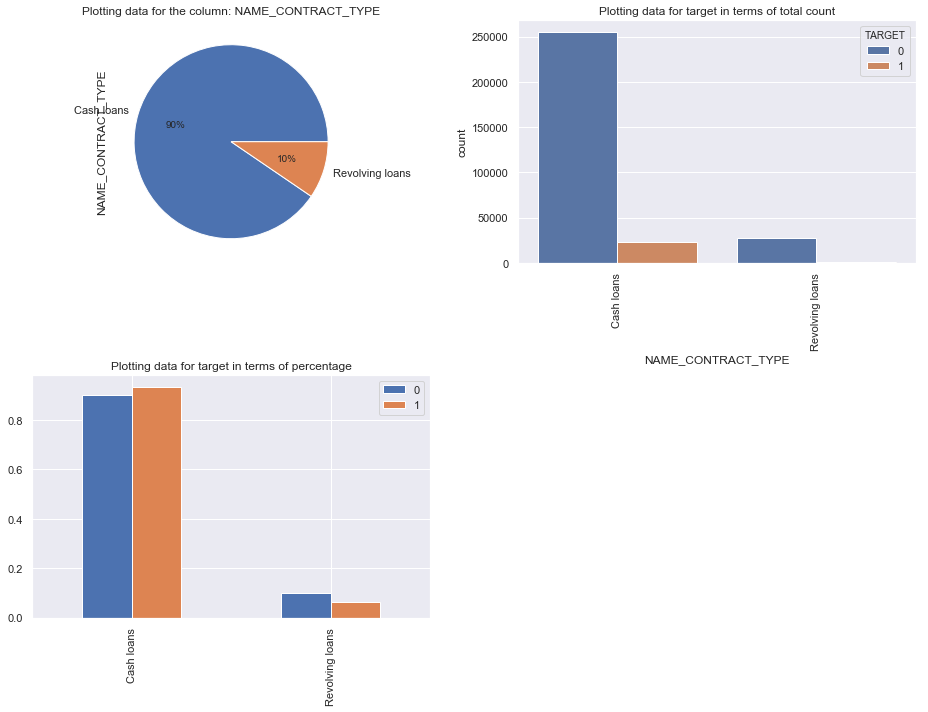

----------------X------------------------------X----------------------------X--------------------
Plotting  CODE_GENDER


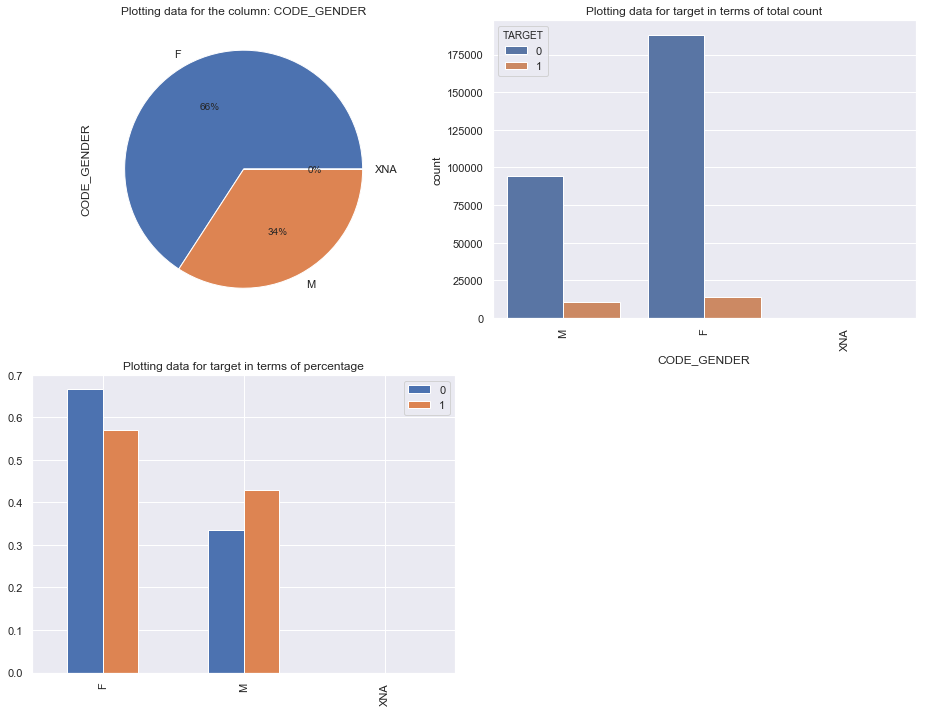

----------------X------------------------------X----------------------------X--------------------
Plotting  FLAG_OWN_CAR


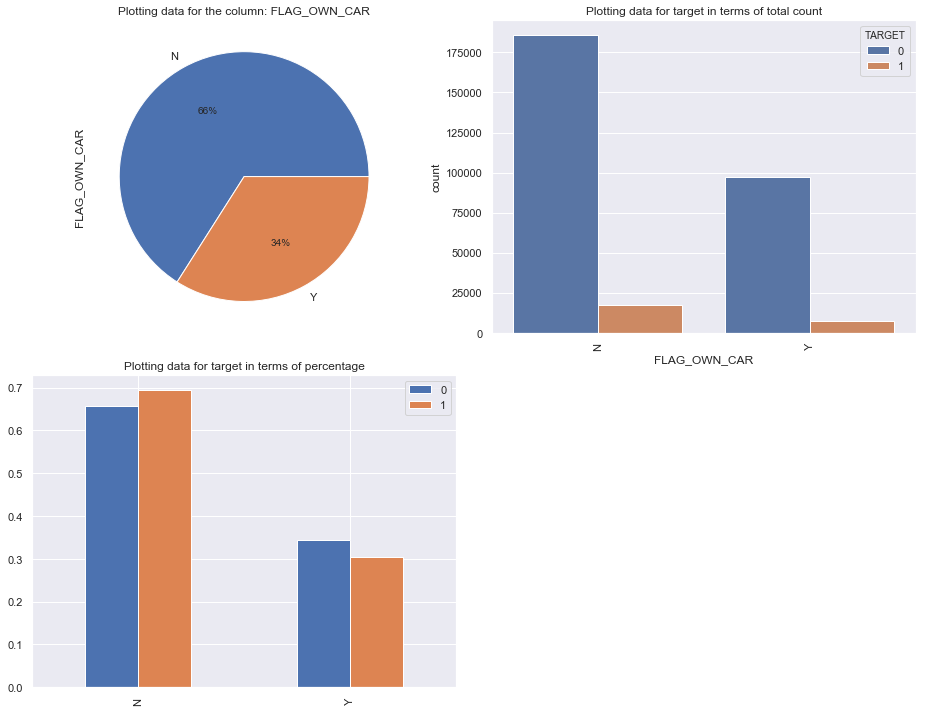

----------------X------------------------------X----------------------------X--------------------
Plotting  FLAG_OWN_REALTY


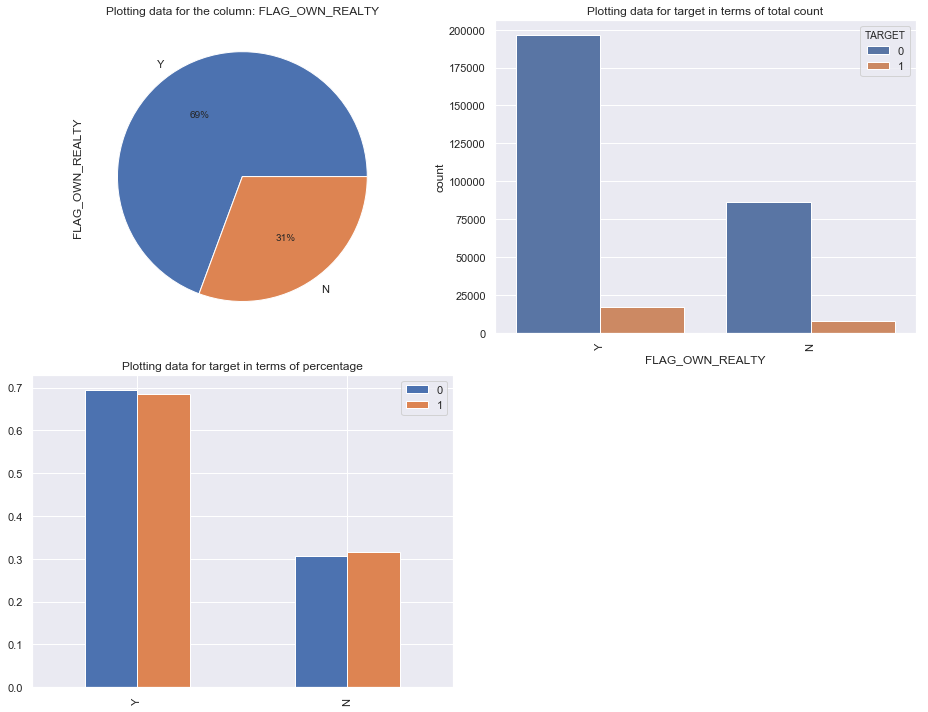

----------------X------------------------------X----------------------------X--------------------
Plotting  NAME_TYPE_SUITE


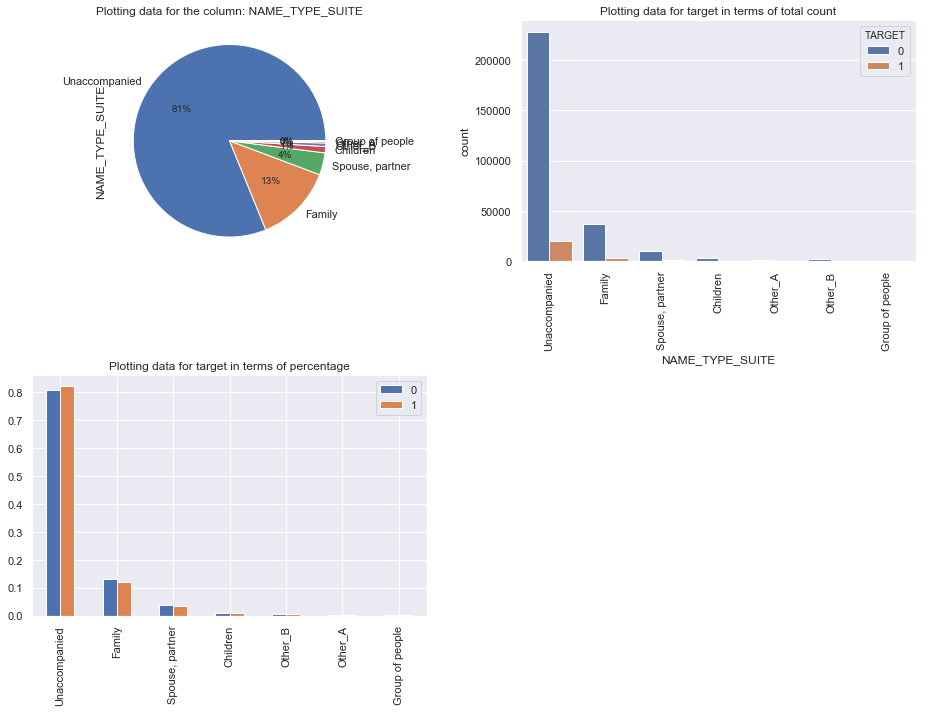

----------------X------------------------------X----------------------------X--------------------
Plotting  NAME_INCOME_TYPE


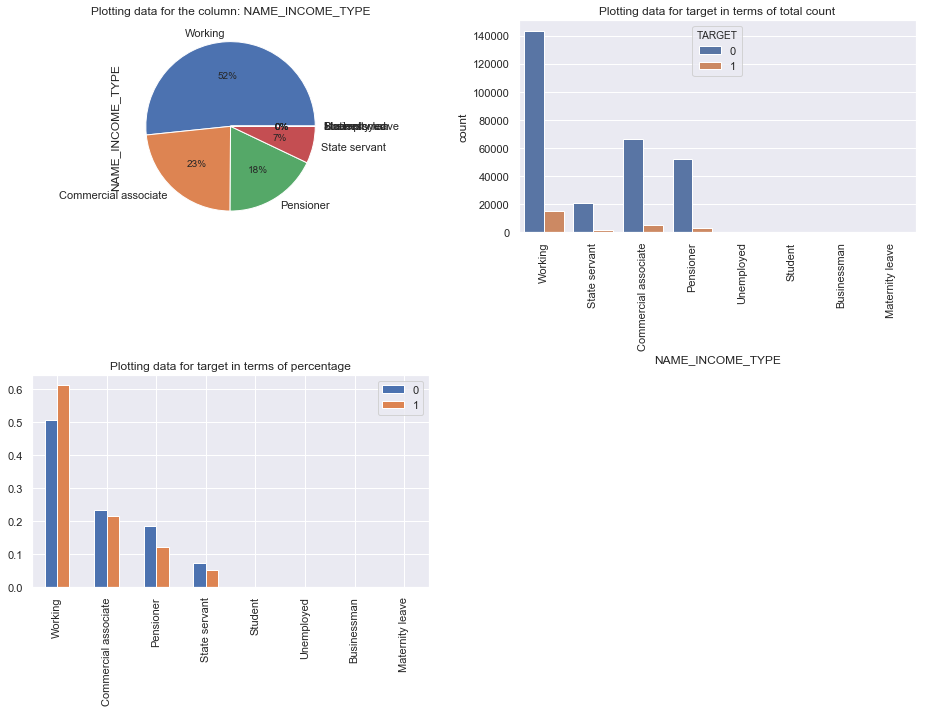

----------------X------------------------------X----------------------------X--------------------
Plotting  NAME_EDUCATION_TYPE


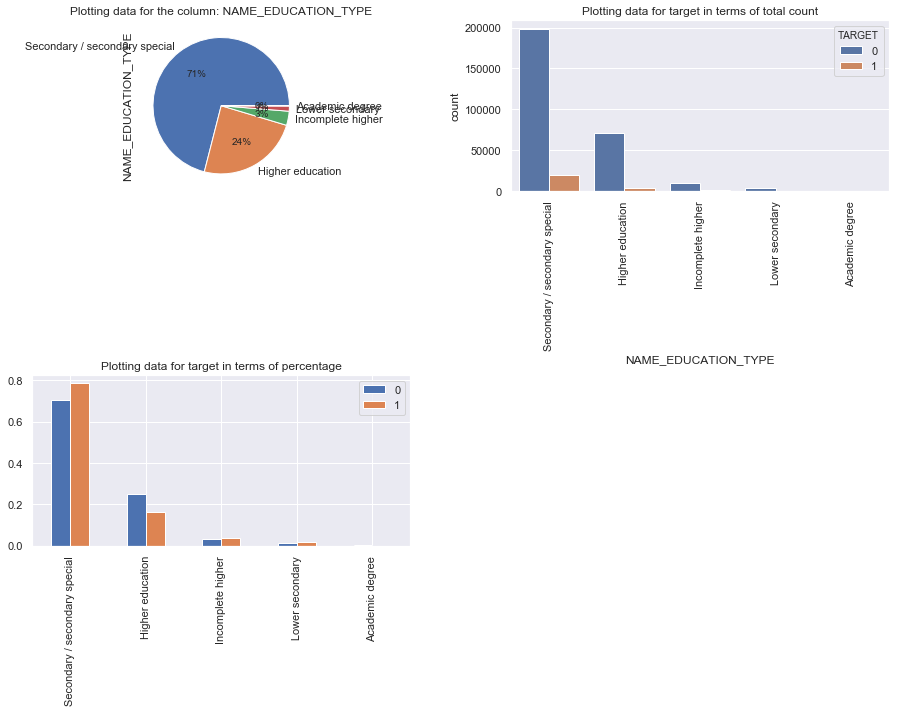

----------------X------------------------------X----------------------------X--------------------
Plotting  NAME_FAMILY_STATUS


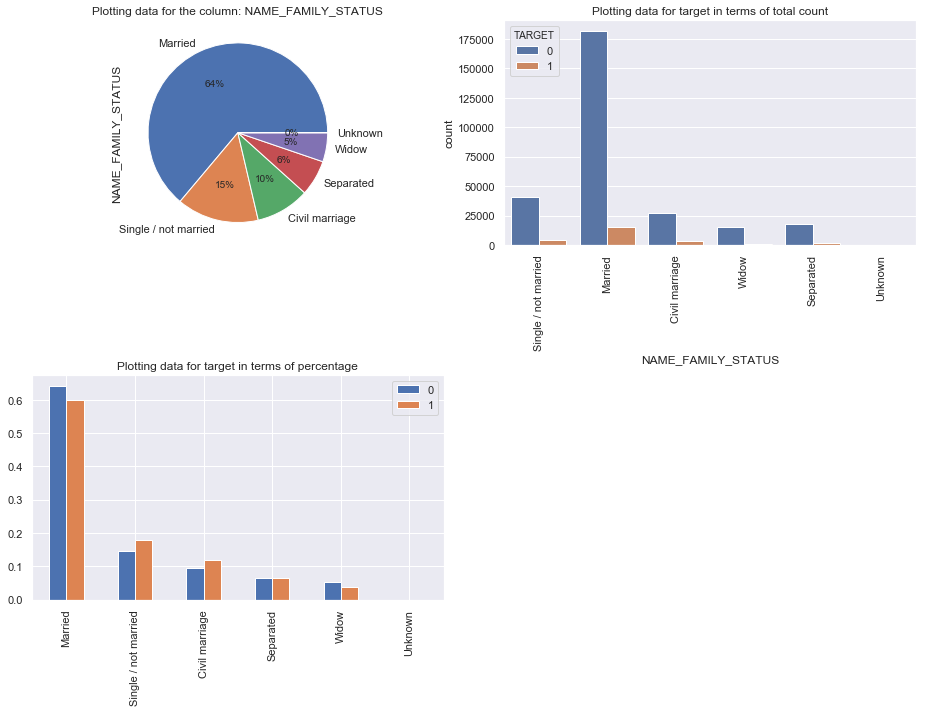

----------------X------------------------------X----------------------------X--------------------
Plotting  NAME_HOUSING_TYPE


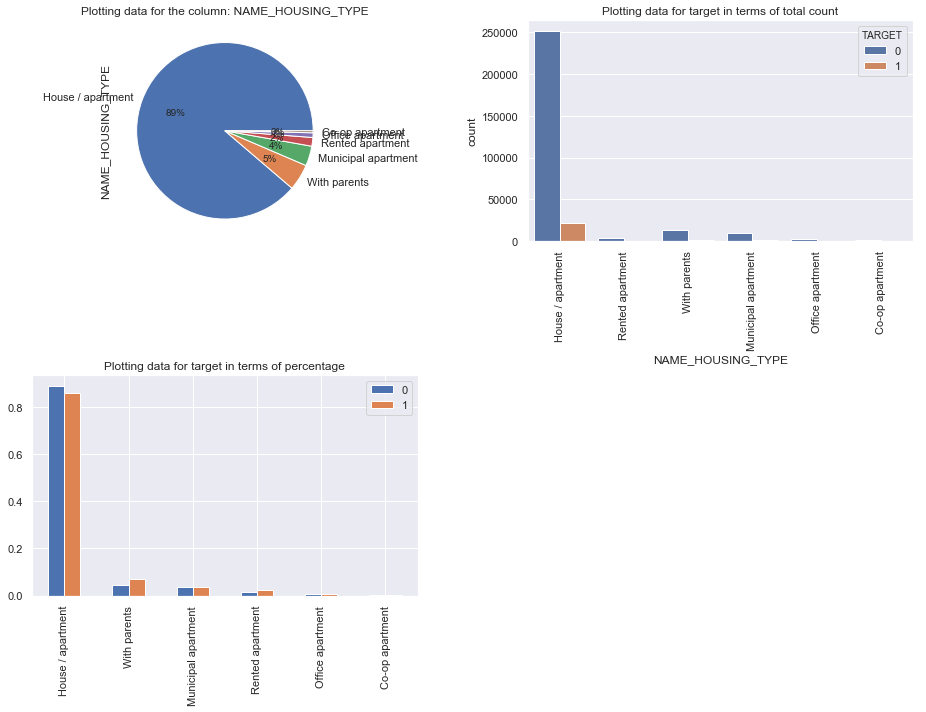

----------------X------------------------------X----------------------------X--------------------
Plotting  OCCUPATION_TYPE


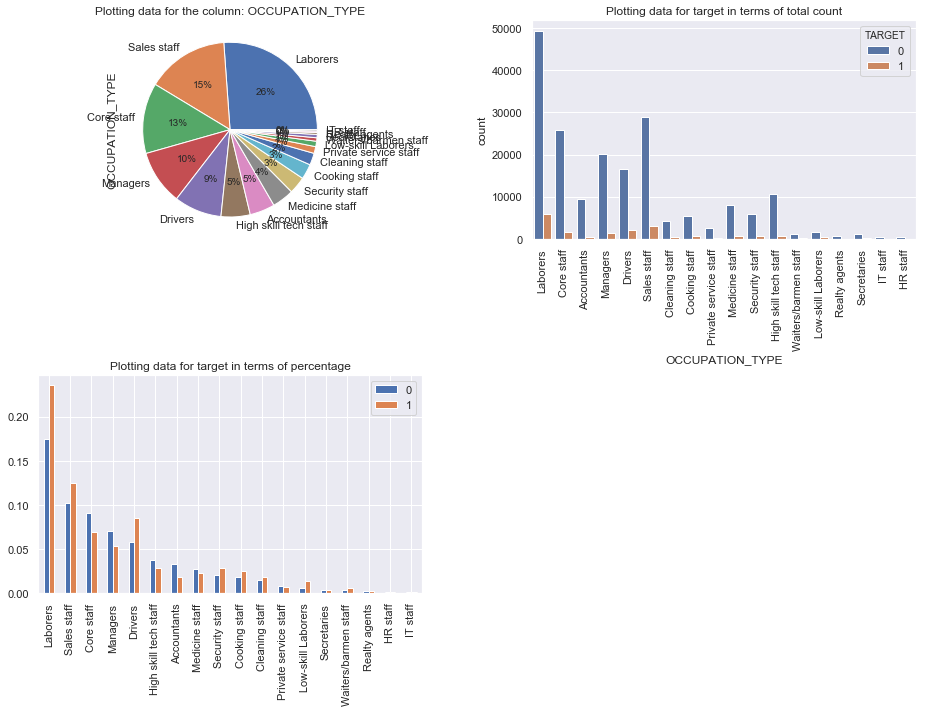

----------------X------------------------------X----------------------------X--------------------
Plotting  WEEKDAY_APPR_PROCESS_START


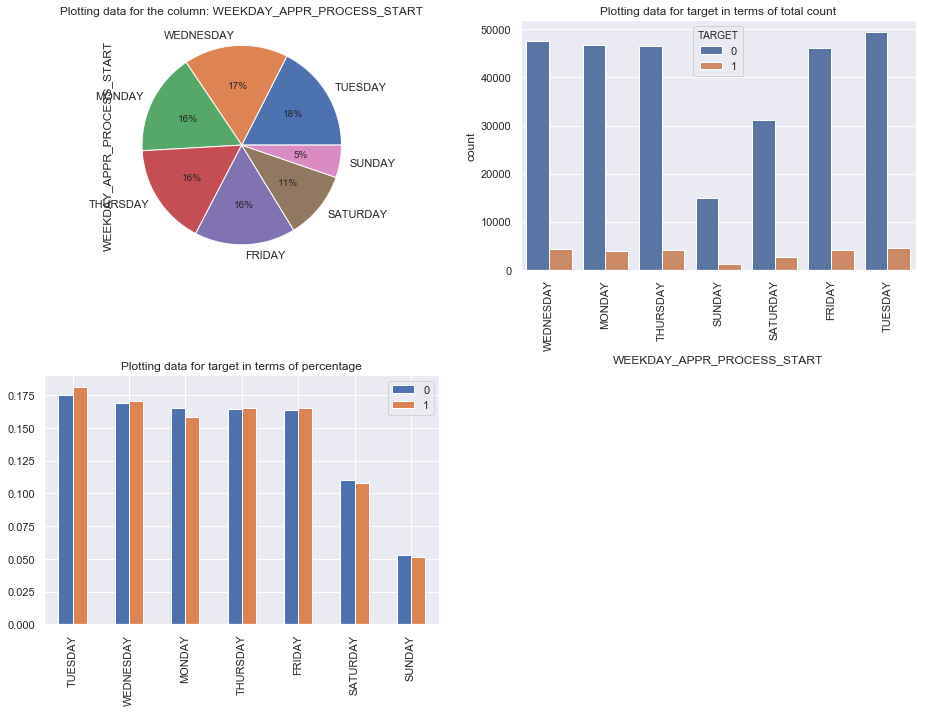

----------------X------------------------------X----------------------------X--------------------
Plotting  ORGANIZATION_TYPE


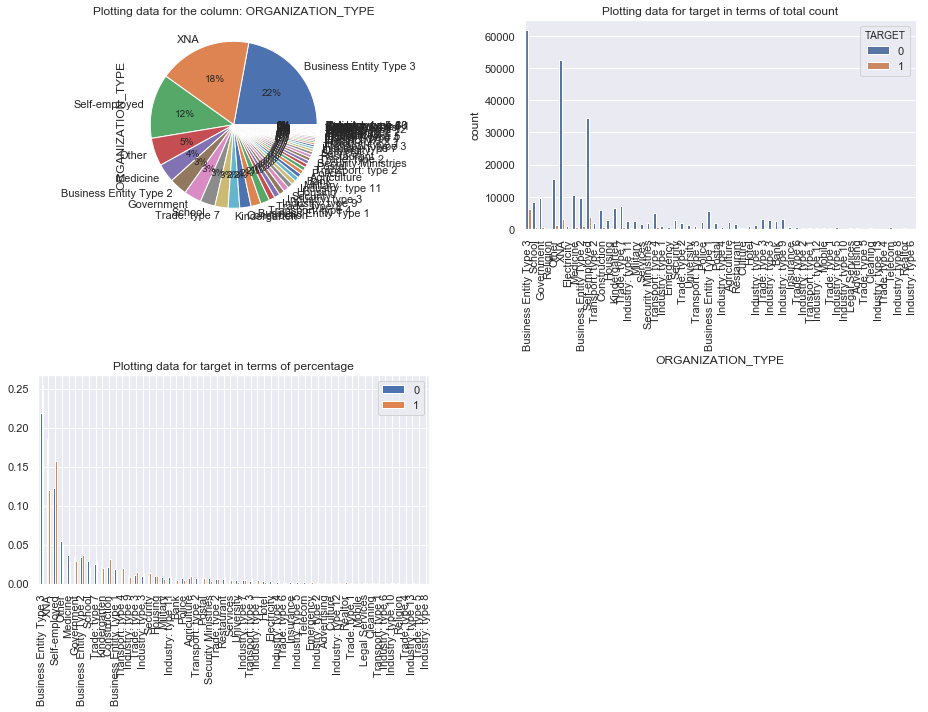

----------------X------------------------------X----------------------------X--------------------
Plotting  EMERGENCYSTATE_MODE


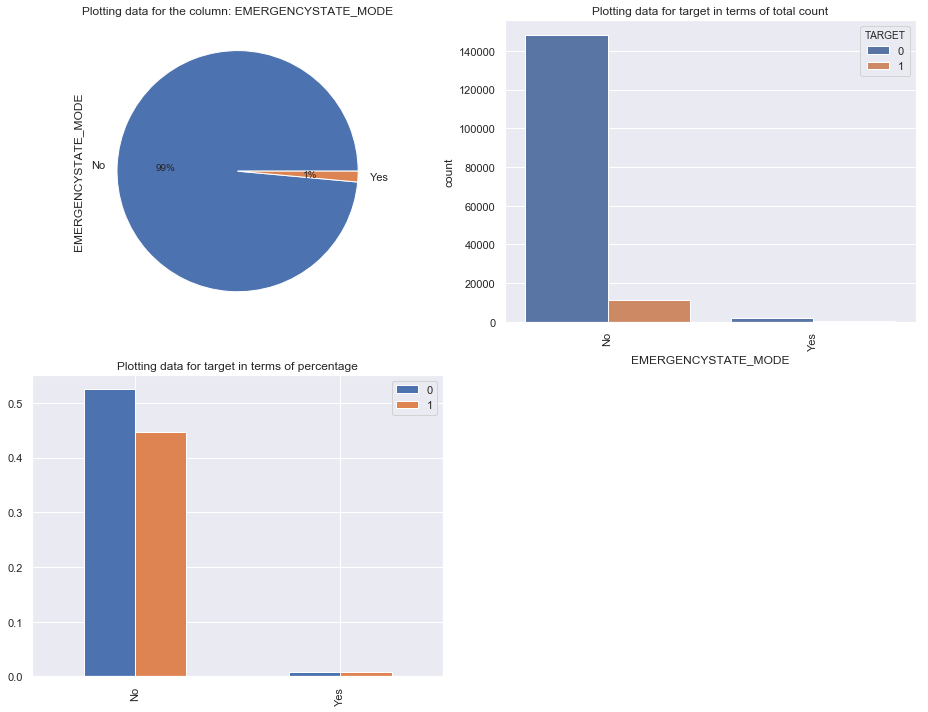

----------------X------------------------------X----------------------------X--------------------


In [43]:
for column in train_categorical:
    print("Plotting ", column)
    plotting(train, train_0, train_1, column)
    print('----------------X------------------------------X----------------------------X--------------------')

# The Columns which seems to be important are:
CODE_GENDER: Less number of males(hist plot) take loan but the defaulters are higher in case of males(dist plot).


NAME_INCOME_TYPE: Pensioner defaulter is lower than non-defaulter.

NAME_EDUCATION_TYPE: Most client take loan for secondary education followed by higher education. But the defualt rate in secondary education is much high and for higher education is much low. 


NAME_FAMILY_STATUS: Most married people apply for loan, and mostly they are not defaulters. Single and civil marriage turns out to be more defaulter.


OCCUPATION_TYPE: Laborers and different categories of staffs mostly take the loan, but the managers and the high skilled tech staffs are most relaible

# Numerical columns


In [44]:
def univar_cont(df,col):
    print('**********************')
    print('Actual Data Spread')
    print('**********************')
    print(df[col].describe())
    Qt = df[col].quantile(0.99)
    df_q = df[df[col] < Qt]
    print('**********************')
    print('Data Spread after removing outliers')
    print('**********************')
    print(df_q[col].describe())
    plt.figure(figsize=(20,10))
    sns.boxplot(data= df_q, x=col,orient='v')
    plt.show()

### <font color='blue'>1.Amount of credit </font>

**********************
Actual Data Spread
**********************
count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64
**********************
Data Spread after removing outliers
**********************
count    3.044340e+05
mean     5.834403e+05
std      3.723969e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.084955e+05
75%      8.086500e+05
max      1.852808e+06
Name: AMT_CREDIT, dtype: float64


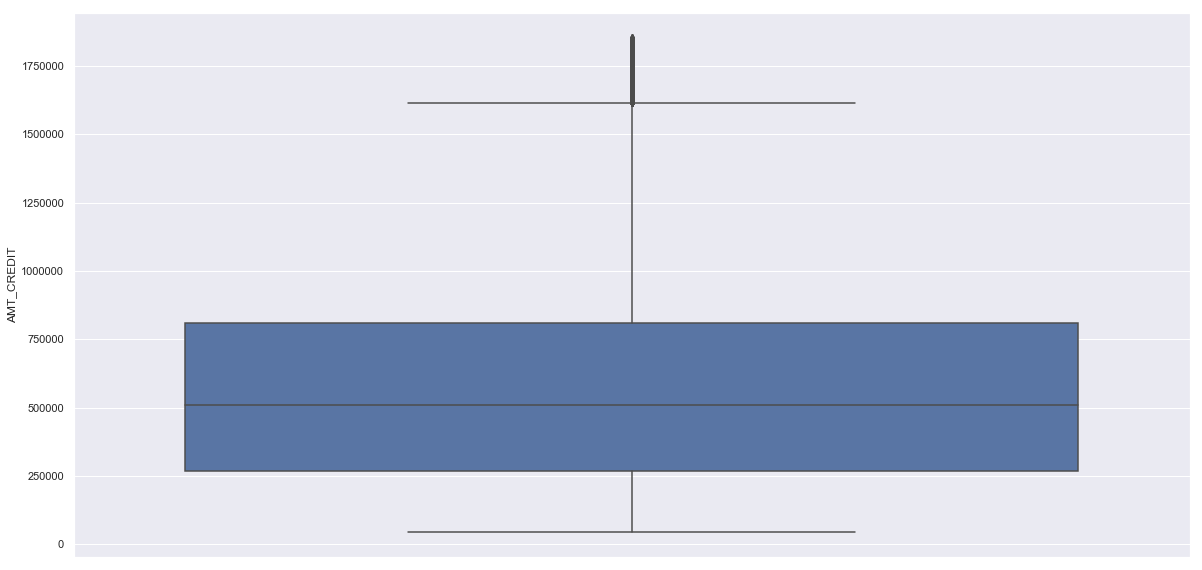

In [45]:
univar_cont(train,col='AMT_CREDIT')

### <font color= 'green'> Observation: Loan amount is distributed between 270000 to 800000 </font>

### <font color='blue'>2.Amount of Income </font>

**********************
Actual Data Spread
**********************
count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64
**********************
Data Spread after removing outliers
**********************
count    304417.000000
mean     162911.014841
std       77494.004409
min       25650.000000
25%      112500.000000
50%      144000.000000
75%      202500.000000
max      469800.000000
Name: AMT_INCOME_TOTAL, dtype: float64


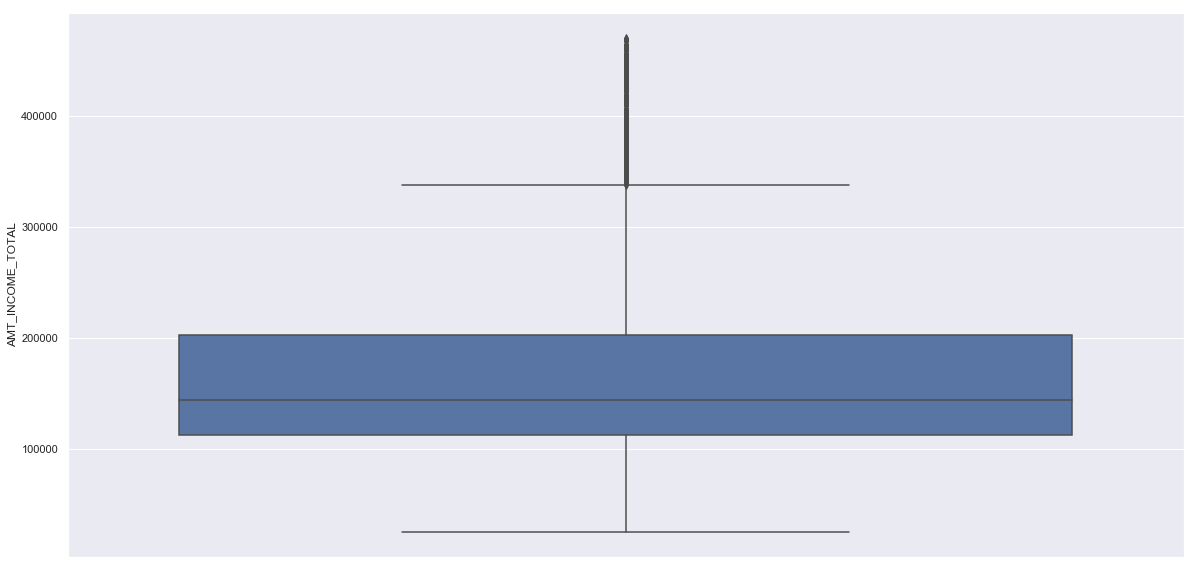

In [46]:
univar_cont(train,col='AMT_INCOME_TOTAL')

### <font color= 'green'> Observation: Income amount is distributed beetween 112500 to 202500 </font>

### <font color='blue'>3. Amount of Annuity</font>

**********************
Actual Data Spread
**********************
count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64
**********************
Data Spread after removing outliers
**********************
count    304418.000000
mean      26498.619144
std       13032.387753
min        1615.500000
25%       16456.500000
50%       24745.500000
75%       34182.000000
max       69988.500000
Name: AMT_ANNUITY, dtype: float64


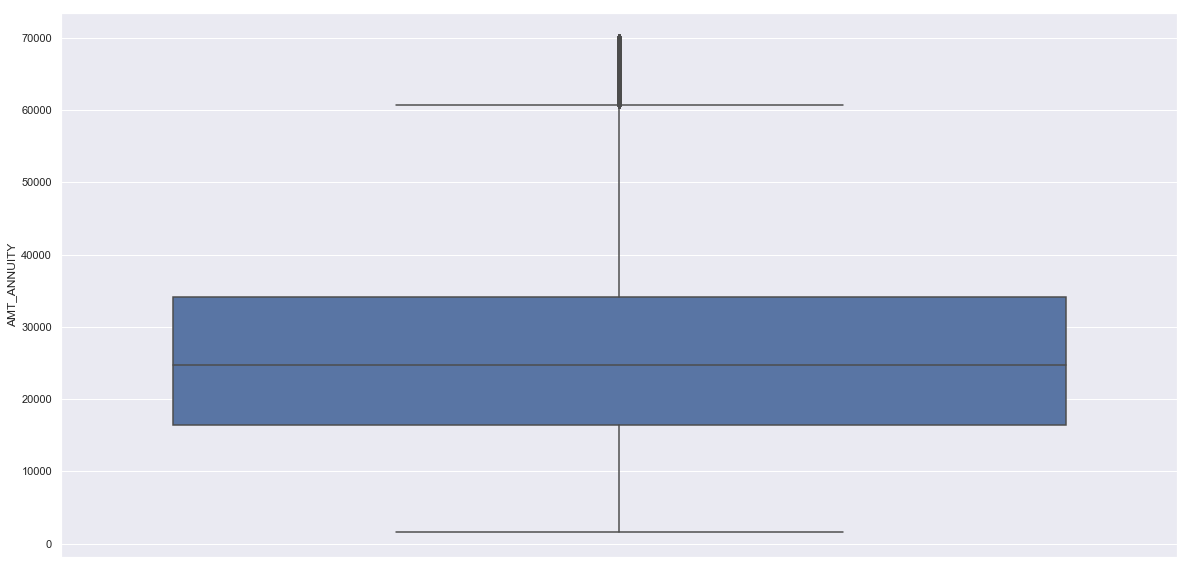

In [47]:
univar_cont(train,col='AMT_ANNUITY')

### <font color= 'green'> Observation : Annuity amount is distributed beetween 16000 to 35000</font>

### <font color='blue'>4.Applicants Age </font>

In [48]:
train['DAYS_BIRTH'] = -round(train['DAYS_BIRTH']/365, 0)
train['DAYS_BIRTH'].head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0    26.0
1    46.0
2    52.0
3    52.0
4    55.0
Name: DAYS_BIRTH, dtype: float64

**********************
Actual Data Spread
**********************
count    307511.000000
mean         43.938646
std          11.964047
min          21.000000
25%          34.000000
50%          43.000000
75%          54.000000
max          69.000000
Name: DAYS_BIRTH, dtype: float64
**********************
Data Spread after removing outliers
**********************
count    303709.000000
mean         43.642437
std          11.740048
min          21.000000
25%          34.000000
50%          43.000000
75%          54.000000
max          66.000000
Name: DAYS_BIRTH, dtype: float64


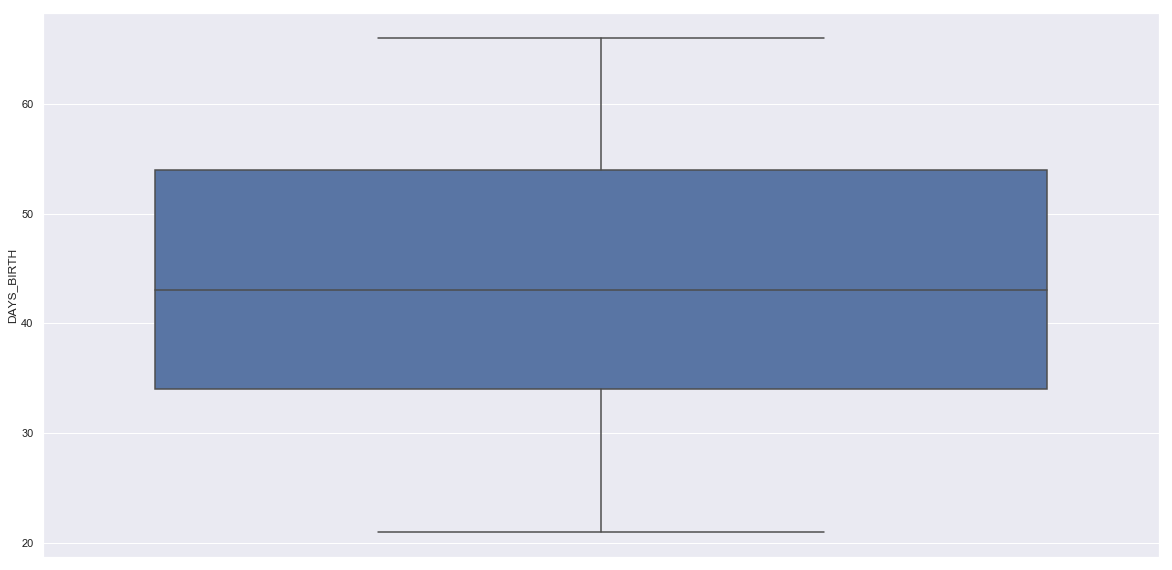

In [49]:
univar_cont(train,col='DAYS_BIRTH')

### <font color= 'green'> Observation : Applicants age is distributed b/w 33 to 53 yrs </font>

### <font color='blue'>5.Work Exp </font>

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


**********************
Actual Data Spread
**********************
count    307511.000000
mean        174.835742
std         387.056895
min         -49.073973
25%          -7.561644
50%          -3.323288
75%          -0.791781
max        1000.665753
Name: DAYS_EMPLOYED, dtype: float64
**********************
Data Spread after removing outliers
**********************
count    252137.000000
mean         -6.531971
std           6.406466
min         -49.073973
25%          -8.698630
50%          -4.515068
75%          -2.101370
max           0.000000
Name: DAYS_EMPLOYED, dtype: float64


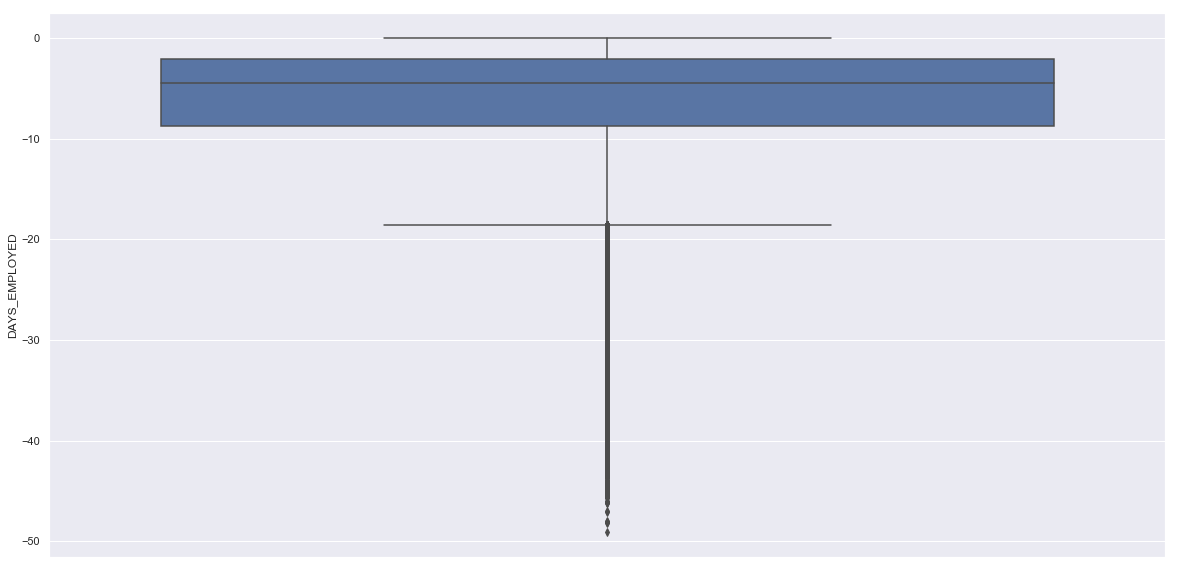

In [50]:
train['DAYS_EMPLOYED'] =train['DAYS_EMPLOYED']/(365)
univar_cont(train,col='DAYS_EMPLOYED')

### <font color= 'green'> Observation : Applicants are atleast have 2 to 8yrs work experience before applying loan </font>

# Analysis for the outliers


Potting the numerial data based on the index and analysing if there are outliers in any of the column. 

In [51]:
train_categorical = train.select_dtypes(include=['int64', 'float64']).columns

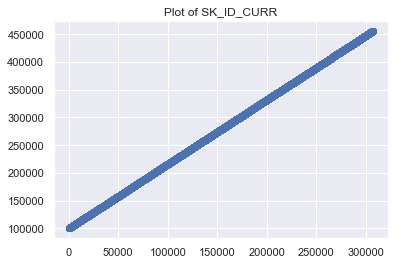

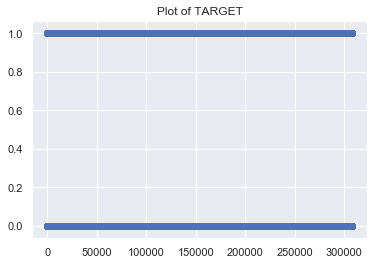

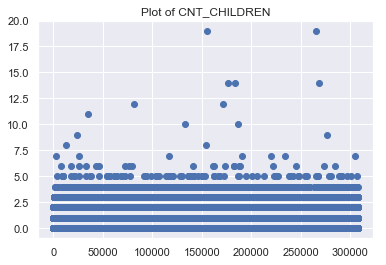

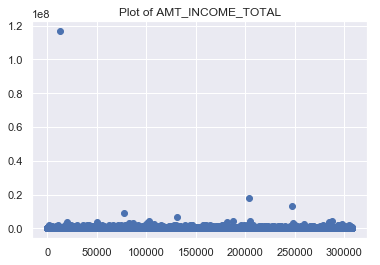

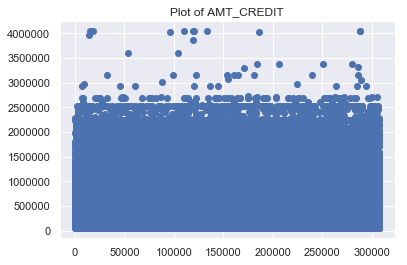

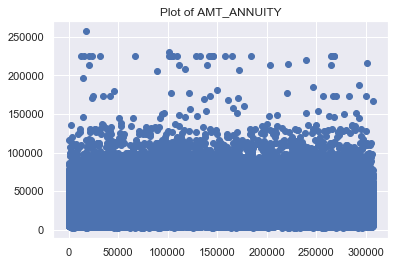

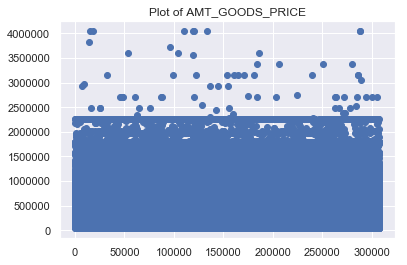

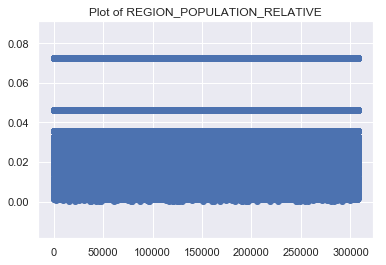

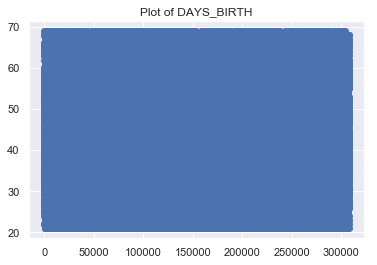

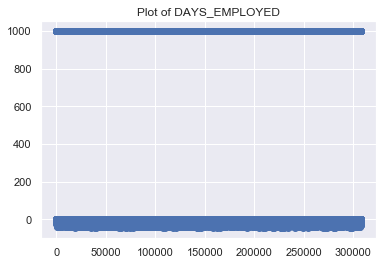

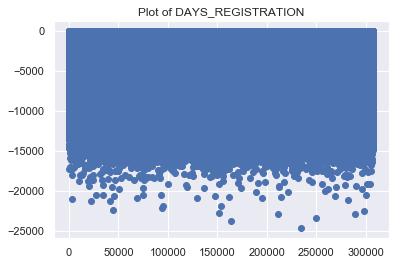

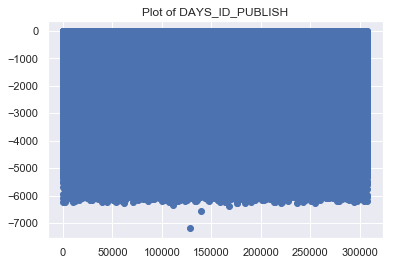

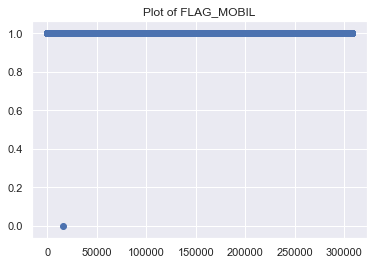

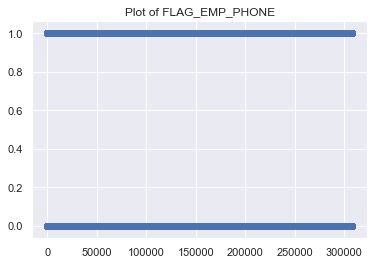

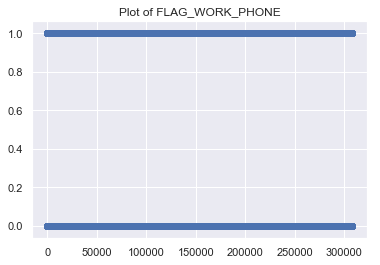

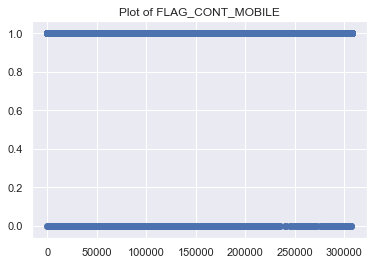

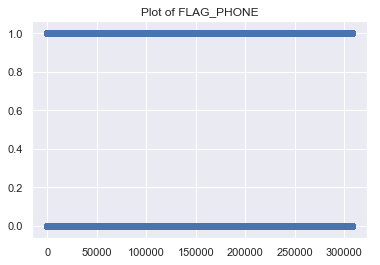

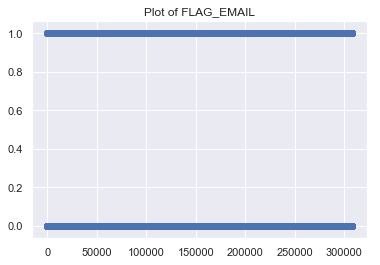

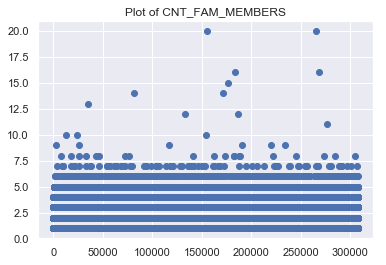

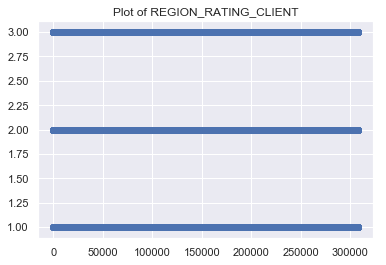

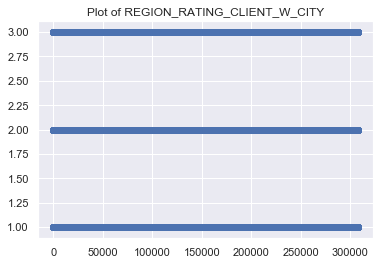

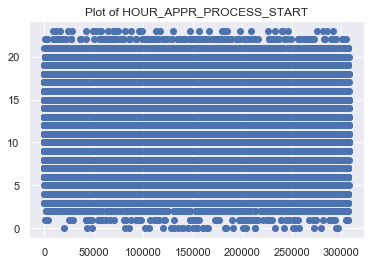

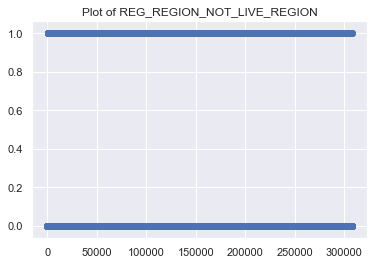

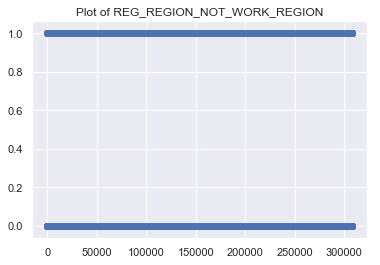

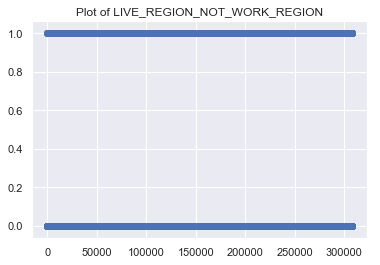

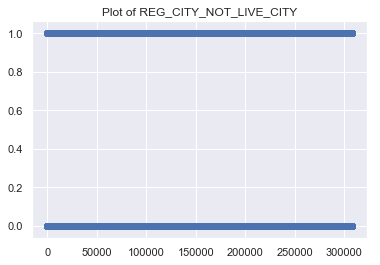

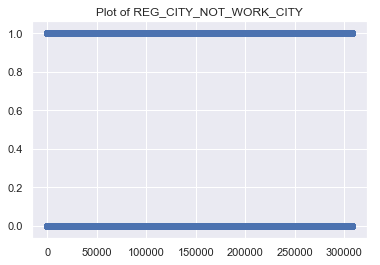

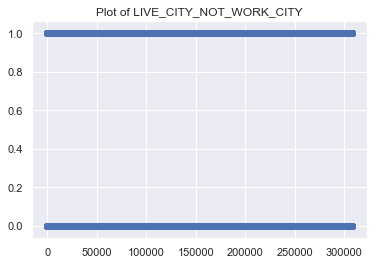

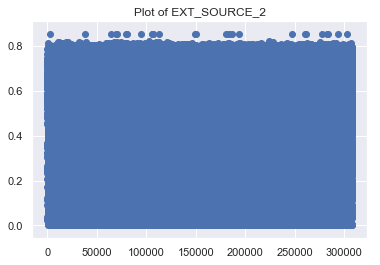

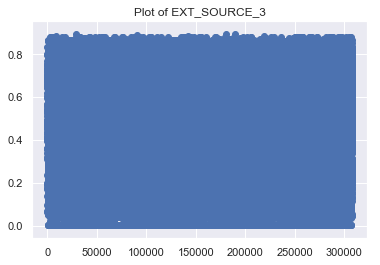

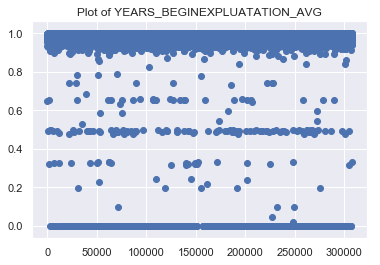

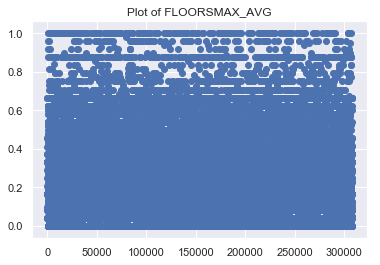

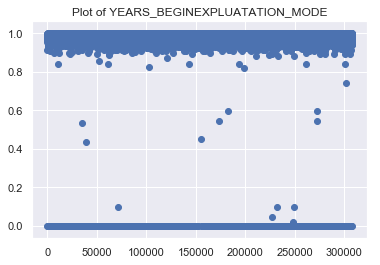

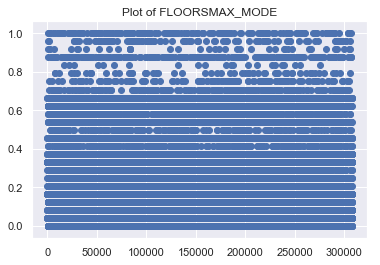

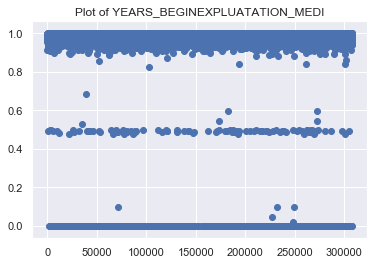

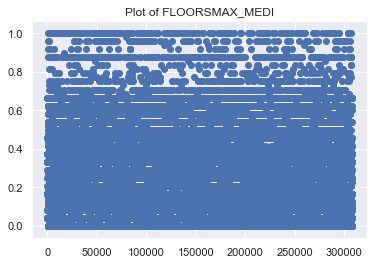

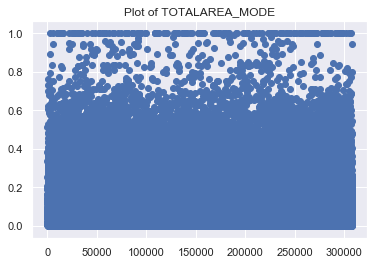

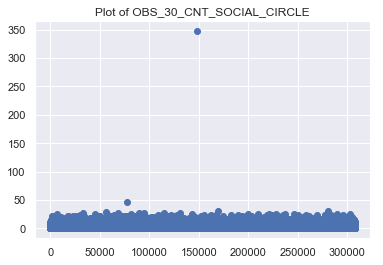

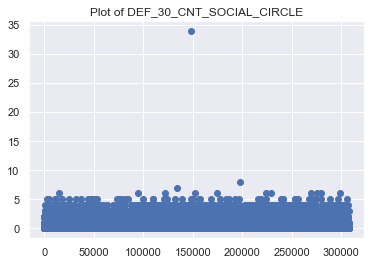

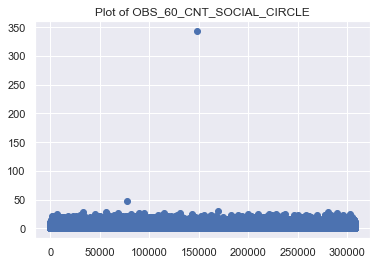

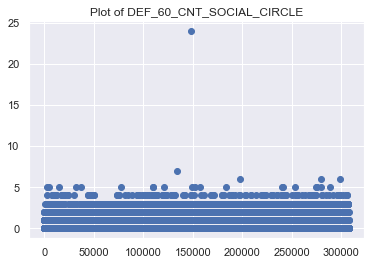

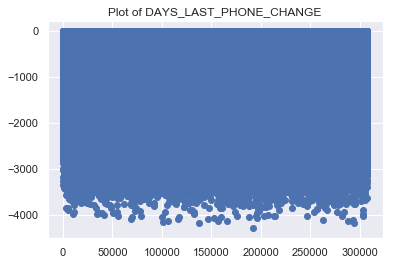

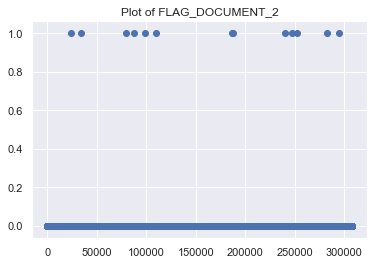

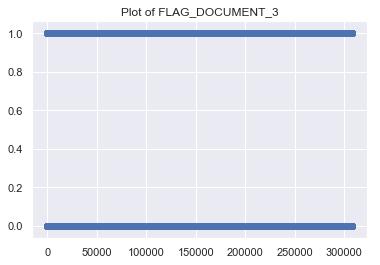

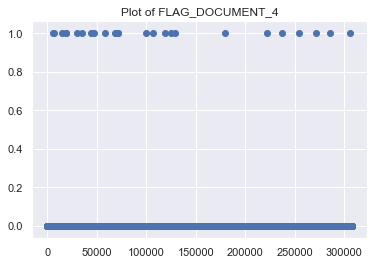

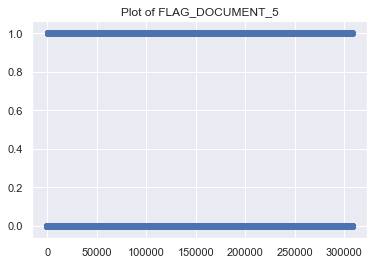

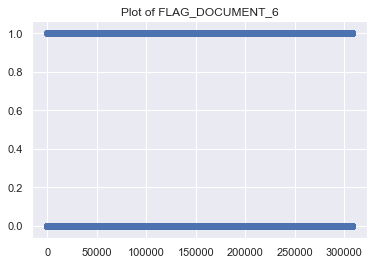

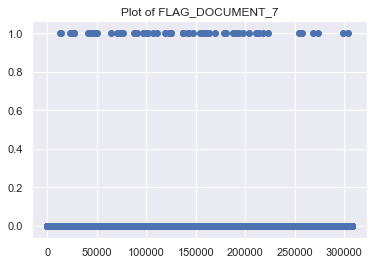

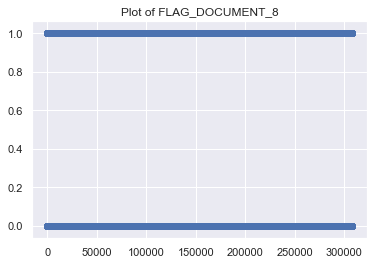

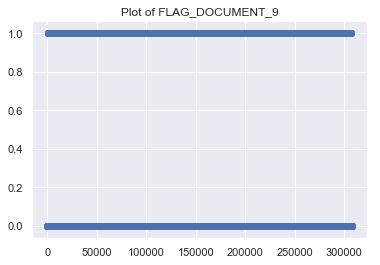

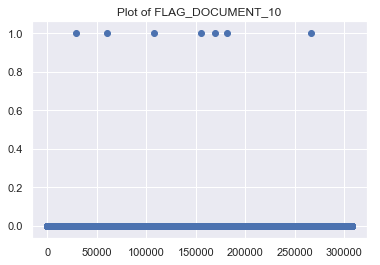

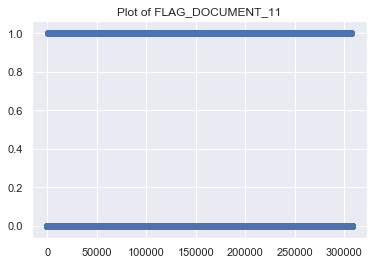

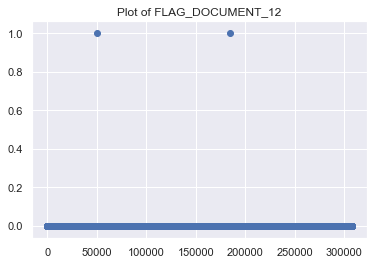

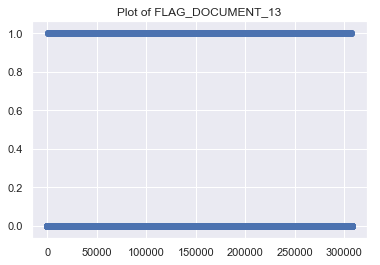

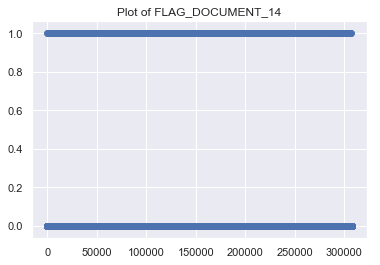

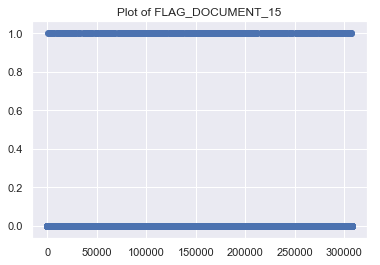

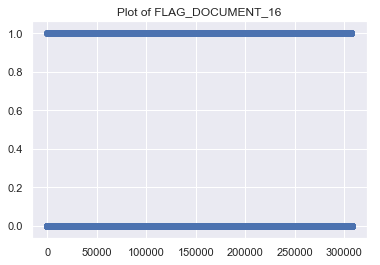

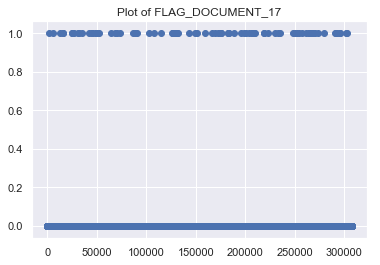

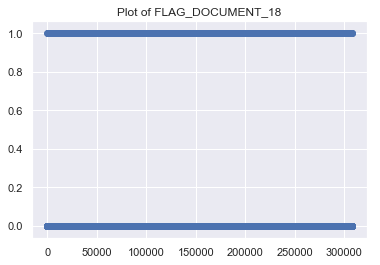

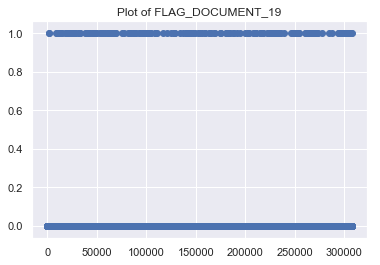

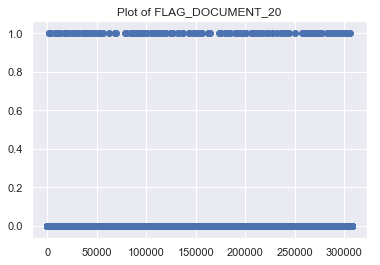

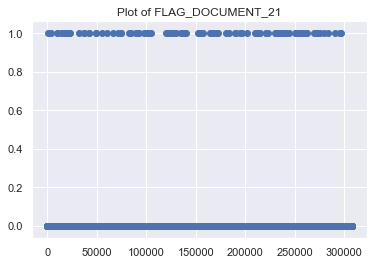

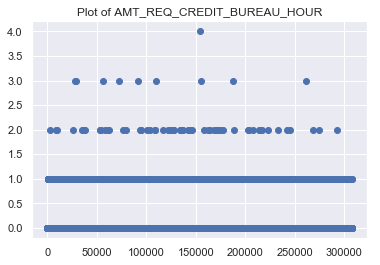

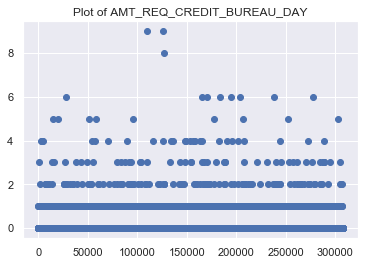

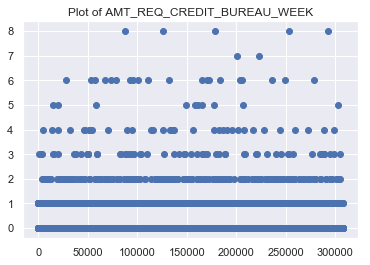

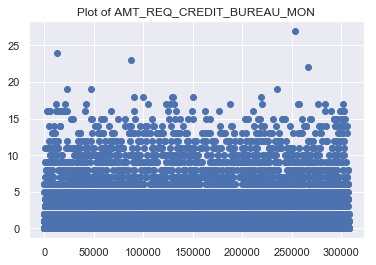

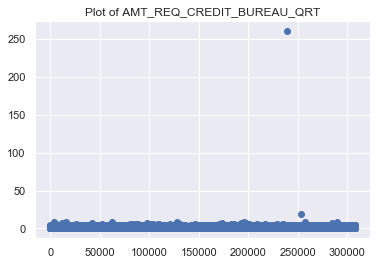

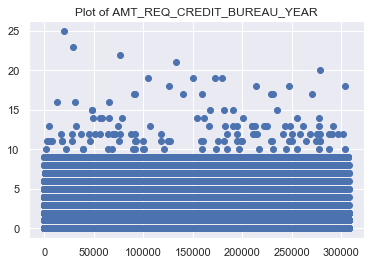

In [52]:
for column in train_categorical:
    title = "Plot of "+column
    plt.scatter(train.index, train[column])
    plt.title(title)
    plt.show()

The analysis of the outliers is mainly based on the bussiness problem. And if the data does not have any error, removing the extreme value will be based on the bussiness need. By analysing the different plots, its seems that there are no error in reporting of the data. So, instead of removing those, we will just point out the columns which contain extreme values. Some of the columns that need to be analyses are:


CNT_CHILDREN - Count of children - Some client have >10 childen, which looks like an extreme value. 



AMT_INCOME_TOTAL - Income of the client - One value with value ~1.2 1e8 seems to be outlier as the value is significantly far away form others and can be removed. 


FLAG_MOBILE - There may be a case where a client does not have mobile. Not sure whether it qualifies to be an outlier. 
Similary, you can see some other columns such as OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE etc

# Converting a numerial data to categorical for analysis


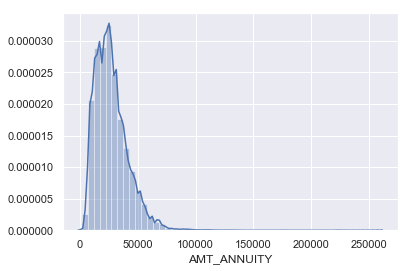

In [53]:
sns.distplot(train['AMT_ANNUITY'].dropna());

In [54]:
def amt_annuity(x):
    if x <= 20000:
        return 'low'
    elif x > 20000 and x <=50000:
        return 'medium'
    elif x > 50000 and x <=100000:
        return 'high'
    else:
        return 'very high'

train['amt_annuity_categorical'] = train['AMT_ANNUITY'].apply(lambda x: amt_annuity(x))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


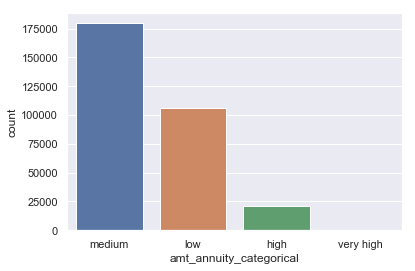

In [55]:
sns.countplot(x= 'amt_annuity_categorical', data = train);

### <font color='blue'>Reading previous application </font>

In [56]:
previous_application = pd.read_csv('.\\previous_application.csv')
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
# Shape of previous application
previous_application.shape

(1670214, 37)

### <font color= 'green'> Column 'SK_ID_CURR' is duplicating meaning person could have taken loan multiple times</font>


In [58]:
# Number of unique id in previous application
previous_application.SK_ID_PREV.value_counts()

1000983    1
2428426    1
1026910    1
1024863    1
2448896    1
2446849    1
2444802    1
2442755    1
2457092    1
2455045    1
2452998    1
2432520    1
2426379    1
2465304    1
2440716    1
2438669    1
2434575    1
2481680    1
2479633    1
2477586    1
2475539    1
2489876    1
2487829    1
2485782    1
1028957    1
1031004    1
1016667    1
1018714    1
1749501    1
1747454    1
          ..
1275707    1
1265468    1
1263421    1
1269566    1
1306408    1
1285926    1
1230605    1
1279781    1
1236750    1
1234703    1
1191696    1
1189649    1
1183508    1
1181461    1
1187606    1
1185559    1
1208088    1
1206041    1
1212186    1
1210139    1
1199900    1
1197853    1
1203998    1
1201951    1
1290016    1
1287969    1
1294114    1
1292067    1
1281828    1
1001961    1
Name: SK_ID_PREV, Length: 1670214, dtype: int64

In [59]:
# Number of unique id in previous application
previous_application.SK_ID_CURR.value_counts()

187868    77
265681    73
173680    72
242412    68
206783    67
156367    66
389950    64
382179    64
198355    63
345161    62
446486    62
238250    61
280586    61
227585    60
206862    60
133023    60
242431    59
401563    59
235163    58
110899    58
205430    55
379932    55
303706    54
297331    54
336606    54
344403    54
426540    53
408214    52
189332    52
404929    52
          ..
102570     1
265187     1
100914     1
452318     1
148203     1
342816     1
386014     1
407647     1
448216     1
177507     1
373716     1
165221     1
429779     1
349705     1
345611     1
367569     1
158609     1
353807     1
191848     1
427730     1
193899     1
436301     1
434252     1
374293     1
421583     1
382489     1
426056     1
454726     1
380442     1
124145     1
Name: SK_ID_CURR, Length: 338857, dtype: int64

##### <font color= 'green'> As you can see above, the shape of previous application is (1670214, 37) and length of SK_ID_PREV is also (1670214), but length of SK_ID_CURR is (338857), which is less than length of SK_ID_PREV, which tells us that there are duplicate number of SK_ID_PREV
</font>

### <font color= 'green'> Let's merge dataframe: train and previous application based on SK_ID_PREV </font>

##### <font color= 'green'>  After merging both the dataframes, the new dataframe will also have duplicate number of SK_ID_PREV. This should not be a problem, as we are trying to figure out if any pattern is present by including the cases if a lender has previously taken loan more than once
</font>

In [60]:
previous_train = train.merge(previous_application, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')

In [61]:
previous_application.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT',
       'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'], dtype=object)

### <font color= 'green'>The merged dataframe also has multiple values for SK_ID_CURR </font>


In [62]:
#previous_application.SK_ID_CURR.value_counts().head()

##The dataset on Target=0 and Target=1


In [63]:
train_0 = train.loc[train['TARGET'] == 0]
train_1 = train.loc[train['TARGET'] == 1]

In [64]:
ptrain_0 = previous_train.loc[previous_train['TARGET'] == 0]
ptrain_1 = previous_train.loc[previous_train['TARGET'] == 1]

# <font color='blue'>Bivariate Analysis </font>

Here, plotting only for 3 columns, as plotting in loop for all columns was pretty heavy for this size of dataset. 

In [65]:
def plotting(column, hue):
    col = column
    hue = hue
    fig = plt.figure(figsize=(13,10))

    ax1 = plt.subplot(221)
    train[col].value_counts().plot.pie(autopct = "%1.0f%%", ax=ax1 )
    plt.title('Plotting data for the column: '+ column)


    ax2 = plt.subplot(222)
    df = pd.DataFrame()
    df['0']= ((train_0[col].value_counts())/len(train_0))
    df['1']= ((train_1[col].value_counts())/len(train_1))
    df.plot.bar(ax=ax2)
    plt.title('Plotting data for target in terms of total count')


    ax3 = plt.subplot(223)
    sns.countplot(x=col, hue=hue, data=ptrain_0, ax = ax3)
    plt.xticks(rotation=90)
    plt.title('Plotting data for Target=0 in terms of percentage')

    ax4 = plt.subplot(224)
    sns.countplot(x=col, hue=hue, data=ptrain_1, ax = ax4)
    plt.xticks(rotation=90)
    plt.title('Plotting data for Target=1 in terms of percentage')



    fig.tight_layout() 

    plt.show()

### <font color='blue'>Plotting NAME_EDUCATION_TYPE </font>

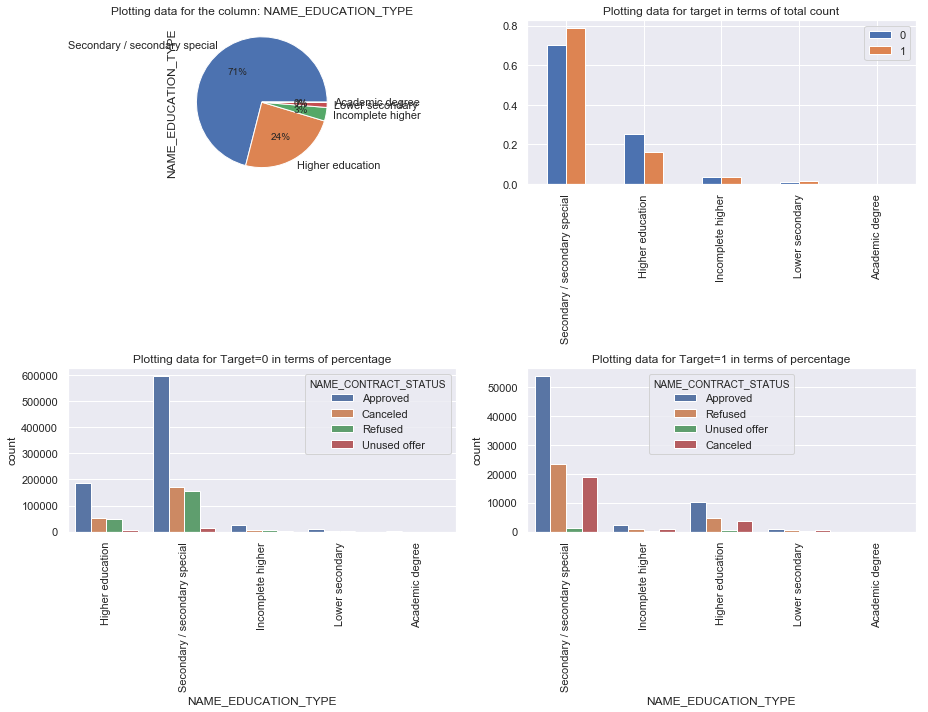

In [66]:
plotting('NAME_EDUCATION_TYPE','NAME_CONTRACT_STATUS') 

### <font color= 'green'> Observation: People tend to make more loan for 'Secondary special' and their loan is also approved.  </font>

#### <font color='blue'>Plotting: NAME_FAMILY_STATUS </font>

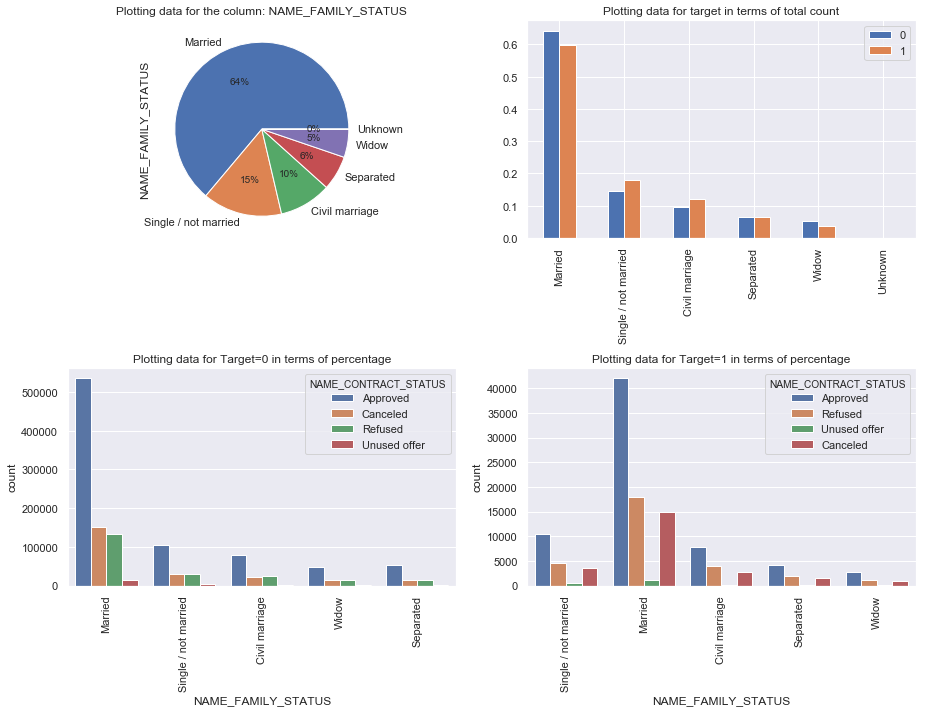

In [67]:
plotting('NAME_FAMILY_STATUS','NAME_CONTRACT_STATUS')  

#### <font color= 'green'> Observation: You can see, there is a clear difference for the categories for "Approved, Refused, Unused and Cancelled" for the category: Married. Married people tends to pay loan on time than Singles. </font>

### <font color='blue'>Plotting: NAME_HOUSING_TYPE </font>

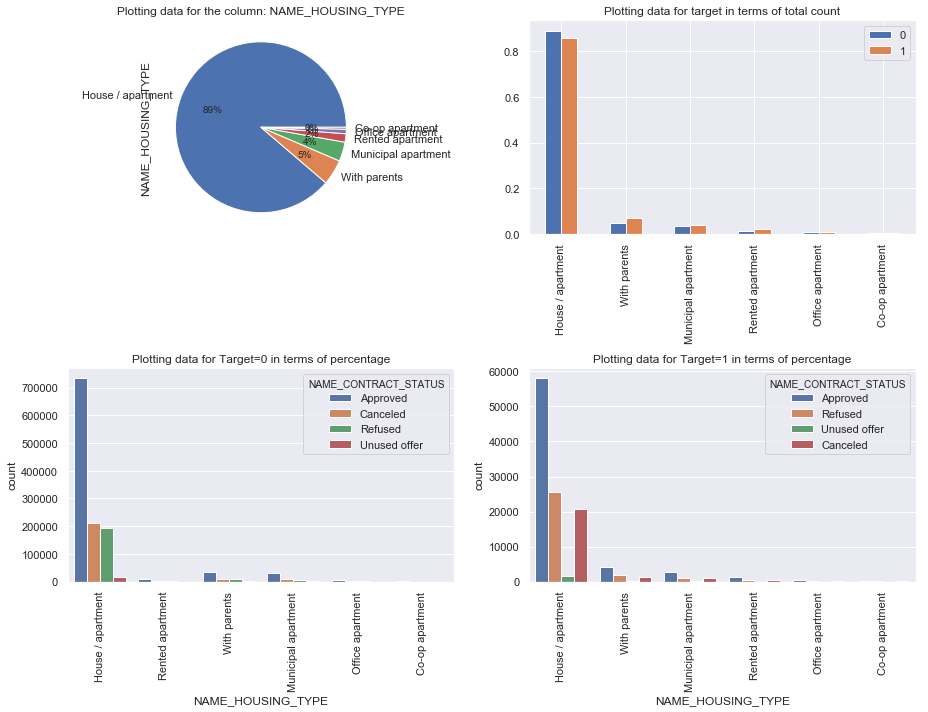

In [68]:
plotting('NAME_HOUSING_TYPE','NAME_CONTRACT_STATUS')  

#### <font color= 'green'> Observation: You can see, there is a clear difference for the categories for "Approved, Refused, Unused and Cancelled" for the category: House/apartment.</font>

#### <font color='blue'>Plotting: ORGANIZATION_TYPE </font>


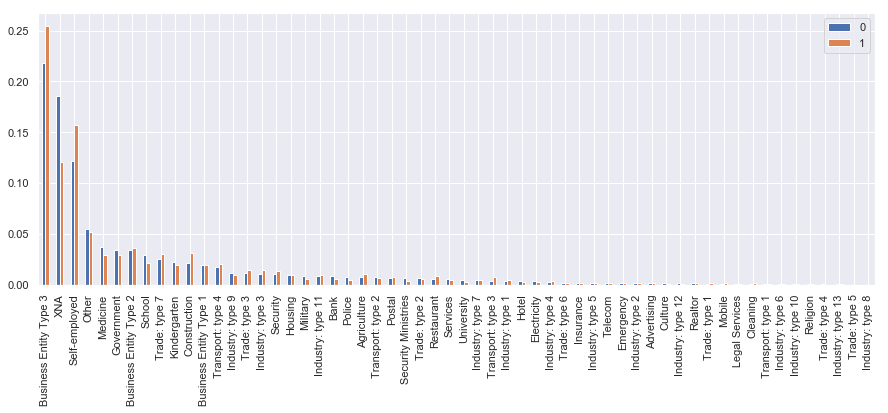

In [69]:
col = 'ORGANIZATION_TYPE'
df = pd.DataFrame()
df['0']= ((train_0[col].value_counts())/len(train_0))
df['1']= ((train_1[col].value_counts())/len(train_1))
sns.set(rc={'figure.figsize':(15,5)})
df.plot.bar()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57]), <a list of 58 Text xticklabel objects>)

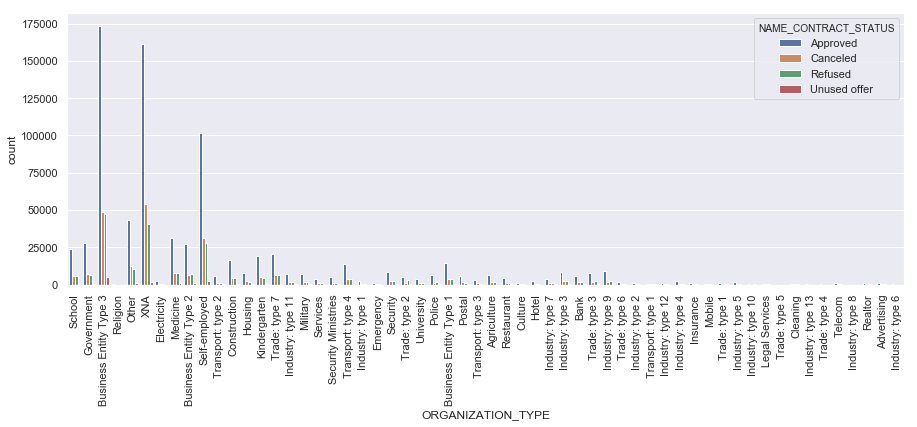

In [70]:
col = 'ORGANIZATION_TYPE'
hue = 'NAME_CONTRACT_STATUS'
sns.countplot(x=col, hue=hue, data=ptrain_0)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57]), <a list of 58 Text xticklabel objects>)

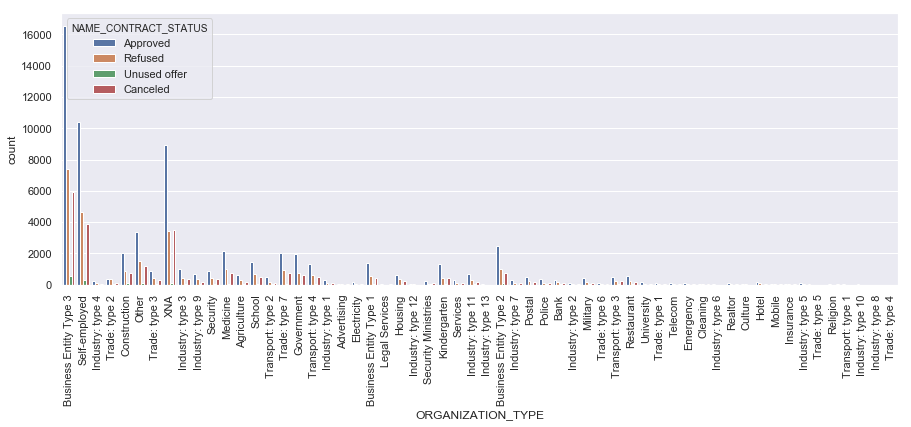

In [71]:
col = 'ORGANIZATION_TYPE'
hue = 'NAME_CONTRACT_STATUS'
sns.countplot(x=col, hue=hue, data=ptrain_1)
plt.xticks(rotation=90)

#### <font color= 'green'> This columns seems to be most important. Bussiness Entity Type 3 and Self-employed tends to be the maxiumum defaulter. The univariate analysis of this dataset was more fruitful than bivariate analysis. </font>

### <font color='blue'>Correlation </font>

In [72]:
# First We will take Coloumns for which we want to perform corelation from Application data


df_corr = train[['TARGET',  'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY','DAYS_BIRTH','DAYS_EMPLOYED']]
df_corr_tar0 = df_corr[df_corr.TARGET == 0]
df_corr_tar1 = df_corr[df_corr.TARGET == 1]

In [73]:
Corr = df_corr.corr()
Corr_tar0 = df_corr_tar0.corr()
Corr_tar1 = df_corr_tar1.corr()

###### <font color='blue'>Correlation for entire set</font>


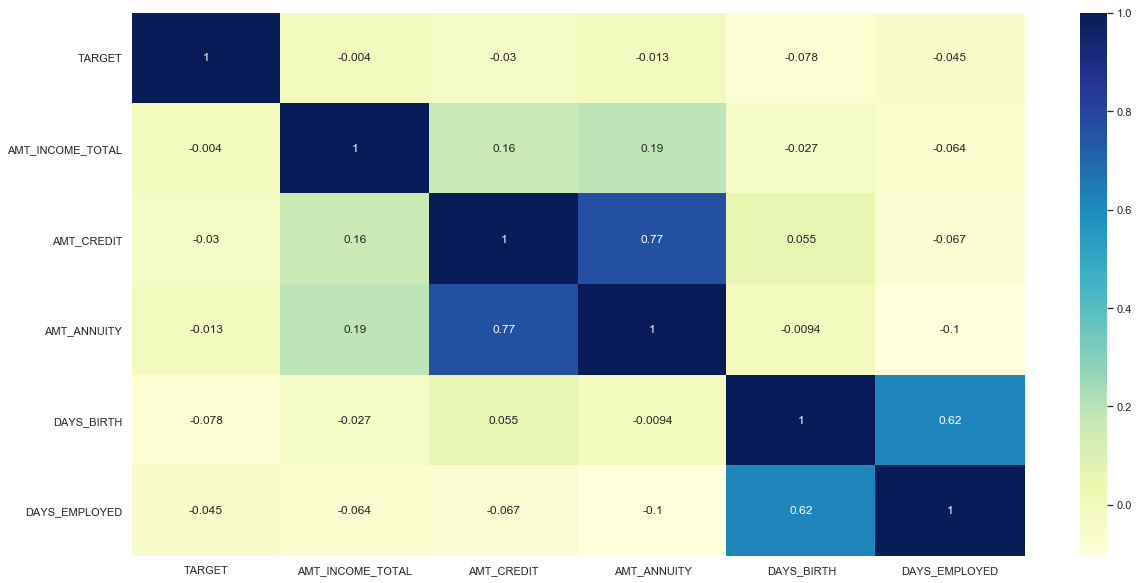

In [74]:
plt.figure(figsize=(20,10))
sns.heatmap(Corr, cmap="YlGnBu", annot=True)
plt.show()

### <font color='blue'>Correlation for dataset when Target = 0 </font>

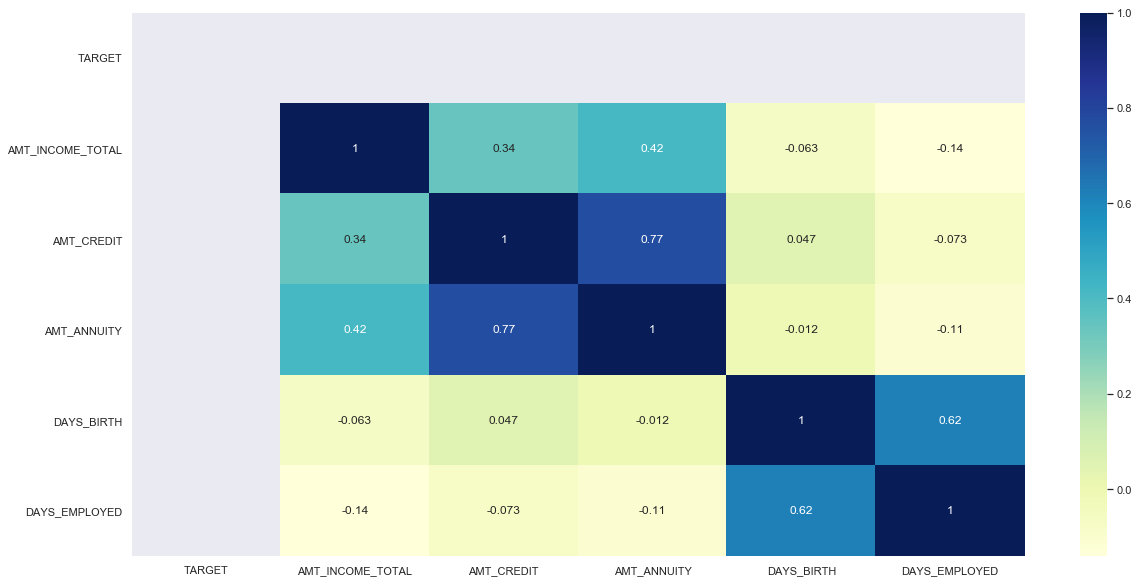

In [75]:
plt.figure(figsize=(20,10))
sns.heatmap(Corr_tar0, cmap="YlGnBu", annot=True)
plt.show()

### <font color='blue'>Correlation for dataset when Target = 1</font>

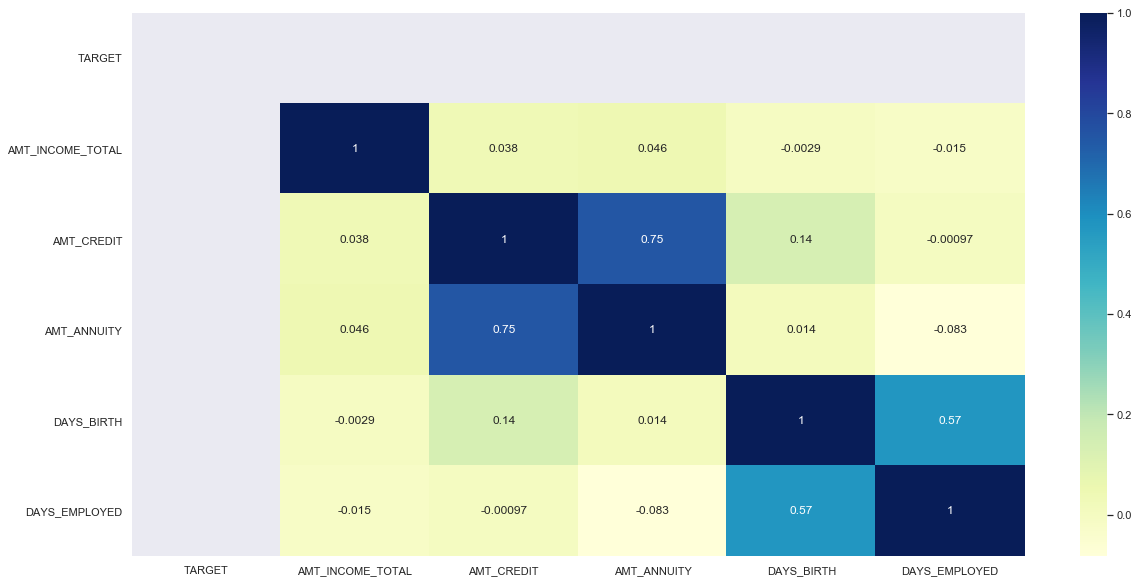

In [76]:
plt.figure(figsize=(20,10))
sns.heatmap(Corr_tar1, cmap="YlGnBu", annot=True)
plt.show()

In [77]:
#for Target-0

corr_matrix  = train_0.corr()
corr_matrix.unstack().reset_index()
corr = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
corr_df = corr.unstack().reset_index()
corr_df.columns  = ['VAR1', 'VAR2', 'Correlation']
corr_df = corr_df.dropna(subset = ['Correlation'])
corr_df.Correlation = abs(corr_df.Correlation)
corr_target_0=corr_df.sort_values("Correlation", ascending=False)
corr_target_0.head(10)

,VAR1,VAR2,Correlation
893,FLAG_EMP_PHONE,DAYS_EMPLOYED,0.999758
2689,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998508
2411,FLOORSMAX_MEDI,FLOORSMAX_AVG,0.997018
2342,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_AVG,0.993582
2413,FLOORSMAX_MEDI,FLOORSMAX_MODE,0.988153
412,AMT_GOODS_PRICE,AMT_CREDIT,0.987250
2275,FLOORSMAX_MODE,FLOORSMAX_AVG,0.985603
2206,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_AVG,0.971032
2344,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,0.962064
1379,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.950149


In [78]:
#Target-1

corr_matrix1  = train_1.corr()
corr_matrix1.unstack().reset_index()
corr1 = corr_matrix1.where(np.triu(np.ones(corr_matrix1.shape), k=1).astype(np.bool))
corr_df1 = corr1.unstack().reset_index()
corr_df1.columns  = ['VAR1', 'VAR2', 'Correlation1']
corr_df1 = corr_df1.dropna(subset = ['Correlation1'])
corr_df1.Correlation1 = abs(corr_df1.Correlation1)
corr_target_1=corr_df1.sort_values("Correlation1", ascending=False)
corr_target_1.head(10)

,VAR1,VAR2,Correlation1
893,FLAG_EMP_PHONE,DAYS_EMPLOYED,0.999702
2689,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998269
2411,FLOORSMAX_MEDI,FLOORSMAX_AVG,0.997187
2342,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_AVG,0.996124
2413,FLOORSMAX_MEDI,FLOORSMAX_MODE,0.989195
2275,FLOORSMAX_MODE,FLOORSMAX_AVG,0.986594
412,AMT_GOODS_PRICE,AMT_CREDIT,0.983103
2206,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_AVG,0.980466
2344,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,0.978073
1379,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.956637


1. FLAG_EMP_PHONE & DAYS_EMPLOYED 0.999758,
2. OBS_60_CNT_SOCIAL_CIRCLE & OBS_30_CNT_SOCIAL_CIRCLE 0.998508
3. FLOORSMAX_MEDI & FLOORSMAX_AVG 0.997018
4. YEARS_BEGINEXPLUATATION_MEDI & YEARS_BEGINEXPLUATATION_AVG 0.993582
5. FLOORSMAX_MEDI & FLOORSMAX_MODE 0.988153
6. AMT_GOODS_PRICE & AMT_CREDIT 0.987250
7. FLOORSMAX_MODE & FLOORSMAX_AVG 0.985603
8. YEARS_BEGINEXPLUATATION_MODE & YEARS_BEGINEXPLUATATION_AVG 0.971032
9. YEARS_BEGINEXPLUATATION_MEDI &YEARS_BEGINEXPLUATATION_MODE 0.962064
10. REGION_RATING_CLIENT_W_CITY & REGION_RATING_CLIENT 0.950149


It can be infered from the top 10 co-related columns that that Target 0 & Target 1 dataset following the same pattern.